In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split  # Fix import here
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/ranja/Downloads/Iris(1).csv")

In [3]:
def check_data(df,head=5):
    print(20*"-" + "Information".center(20) + 20*"-")
    print(df.info())
    print(20*"-" + "Data Shape".center(20) + 20*"-")
    print(df.shape)
    print("\n" + 20*"-" + "The First 5 Data".center(20) + 20*"-")
    print(df.head())
    print("\n" + 20 * "-" + "The Last 5 Data".center(20) + 20 * "-")
    print(df.tail())
    print("\n" + 20 * "-" + "Missing Values".center(20) + 20 * "-")
    print(df.isnull().sum())
    print("\n" + 40 * "-" + "Describe the Data".center(40) + 40 * "-")
    print(df.describe([0.01, 0.05, 0.10, 0.50, 0.75, 0.90, 0.95, 0.99]).T)
    
check_data(df)

--------------------    Information     --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
--------------------     Data Shape     --------------------
(150, 6)

--------------------  The First 5 Data  --------------------
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3    

In [4]:
from pandas.api.types import is_numeric_dtype

for col in df.columns:
    if is_numeric_dtype(df[col]):
        print('%s:' % (col))
        print('\t Mean = %.2f' % df[col].mean())
        print('\t Standard deviation = %.2f' % df[col].std())
        print('\t Minimum = %.2f' % df[col].min())
        print('\t Maximum = %.2f' % df[col].max())

Id:
	 Mean = 75.50
	 Standard deviation = 43.45
	 Minimum = 1.00
	 Maximum = 150.00
SepalLengthCm:
	 Mean = 5.84
	 Standard deviation = 0.83
	 Minimum = 4.30
	 Maximum = 7.90
SepalWidthCm:
	 Mean = 3.05
	 Standard deviation = 0.43
	 Minimum = 2.00
	 Maximum = 4.40
PetalLengthCm:
	 Mean = 3.76
	 Standard deviation = 1.76
	 Minimum = 1.00
	 Maximum = 6.90
PetalWidthCm:
	 Mean = 1.20
	 Standard deviation = 0.76
	 Minimum = 0.10
	 Maximum = 2.50


In [5]:
print('Iris-setosa')
setosa = df['Species'] == 'Iris-setosa'
print(df[setosa].describe())

print('\nIris-versicolor')
versicolor = df['Species'] == 'Iris-versicolor'
print(df[versicolor].describe())

print('\nIris-virginica')
virginica = df['Species'] == 'Iris-virginica'
print(df[virginica].describe())

Iris-setosa
             Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  50.00000       50.00000     50.000000      50.000000      50.00000
mean   25.50000        5.00600      3.418000       1.464000       0.24400
std    14.57738        0.35249      0.381024       0.173511       0.10721
min     1.00000        4.30000      2.300000       1.000000       0.10000
25%    13.25000        4.80000      3.125000       1.400000       0.20000
50%    25.50000        5.00000      3.400000       1.500000       0.20000
75%    37.75000        5.20000      3.675000       1.575000       0.30000
max    50.00000        5.80000      4.400000       1.900000       0.60000

Iris-versicolor
              Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count   50.00000      50.000000     50.000000      50.000000     50.000000
mean    75.50000       5.936000      2.770000       4.260000      1.326000
std     14.57738       0.516171      0.313798       0.469911      0.197753
min  

In [6]:
df.drop('Id',axis=1,inplace=True) #dropping the Id column as it is unecessary
# checking dimension (num of rows and columns) of dataset
print("iris data shape (Rows, Columns):", df.shape)

iris data shape (Rows, Columns): (150, 5)


In [7]:
#Checking for duplicates
duplicates = df[df.duplicated()]
print("Number of duplicates:", len(duplicates))

Number of duplicates: 3


In [8]:
print("Duplicate Rows :")
df[df.duplicated()]

Duplicate Rows :


SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
34             4.9           3.1            1.5           0.1     Iris-setosa
37             4.9           3.1            1.5           0.1     Iris-setosa
142            5.8           2.7            5.1           1.9  Iris-virginica

In [9]:
df.duplicated().value_counts()

False    147
True       3
dtype: int64

In [10]:
#Removing duplicates

df.drop_duplicates(inplace=True)
df.duplicated().any()

False

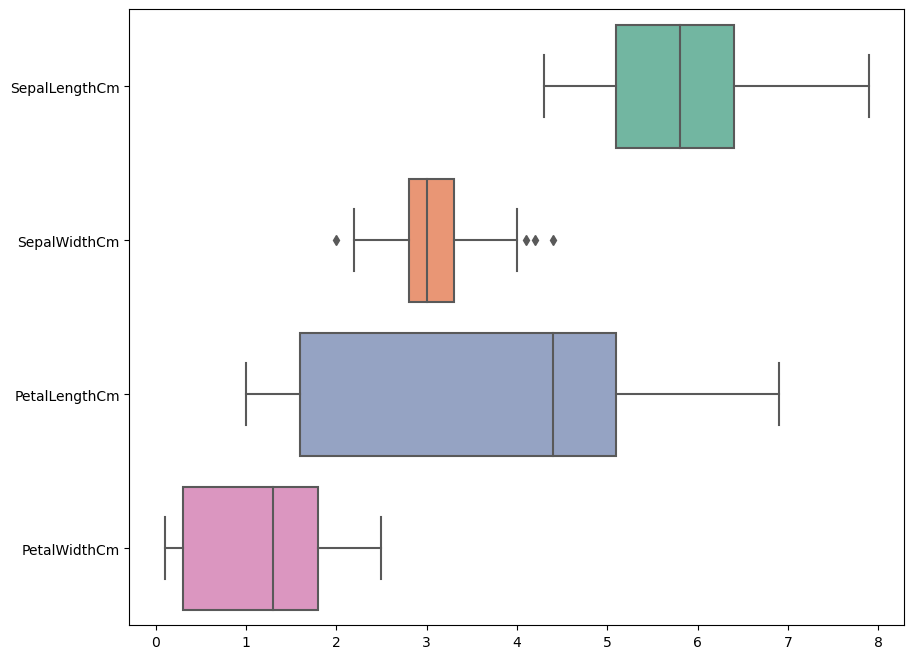

In [11]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df, orient='h', palette='Set2');

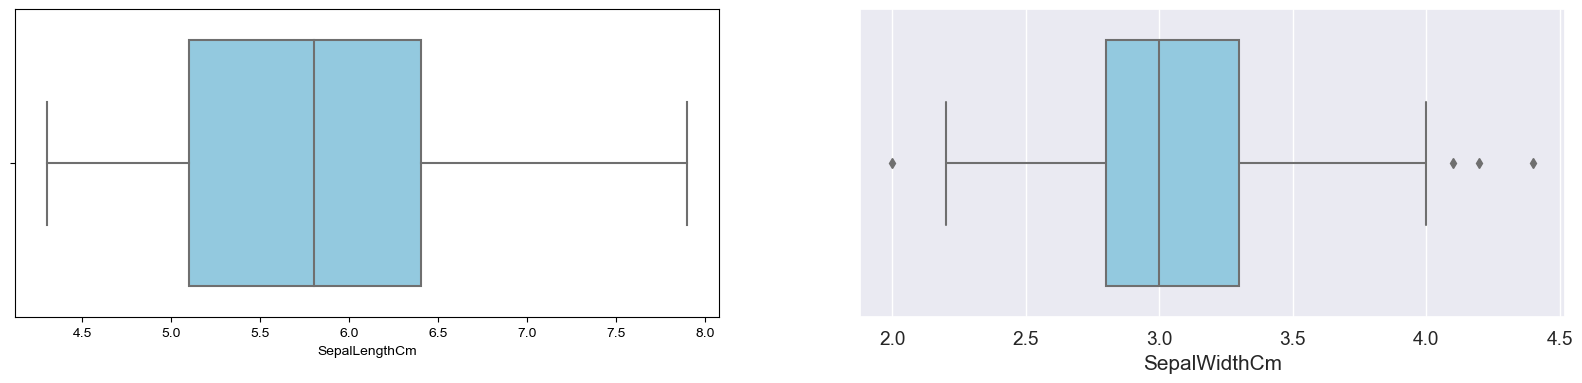

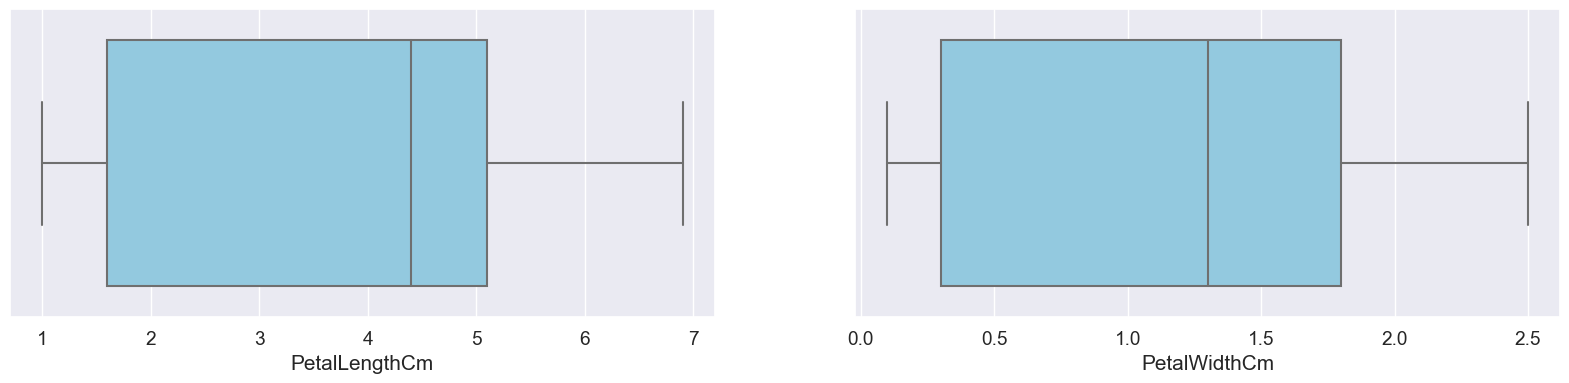

In [12]:
Num = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

j = 0
while j < 5:
    fig = plt.figure (figsize = [20 , 4])
    plt.subplot(1, 2, 1)
    sns.boxplot (x = Num[j] , data = df , color='skyblue')
    sns.set(font_scale=1.25)
    j += 1
    plt.subplot(1, 2, 2)
    sns.boxplot (x = Num[j] , data = df , color='skyblue')
    sns.set(font_scale=1.25)
    j += 1
    if j == 4:
        break
    plt.show()

In [13]:
df.corr()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109321       0.871305      0.817058
SepalWidthCm       -0.109321      1.000000      -0.421057     -0.356376
PetalLengthCm       0.871305     -0.421057       1.000000      0.961883
PetalWidthCm        0.817058     -0.356376       0.961883      1.000000

In [14]:
df.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

In [15]:
# Calculate the skewness for all columns
df.skew()

SepalLengthCm    0.292560
SepalWidthCm     0.324351
PetalLengthCm   -0.293763
PetalWidthCm    -0.113479
dtype: float64

In [16]:
df.skew().sort_values(ascending=True)

PetalLengthCm   -0.293763
PetalWidthCm    -0.113479
SepalLengthCm    0.292560
SepalWidthCm     0.324351
dtype: float64

In [17]:
# Checking for the value counts
df["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

<Axes: xlabel='Species', ylabel='count'>

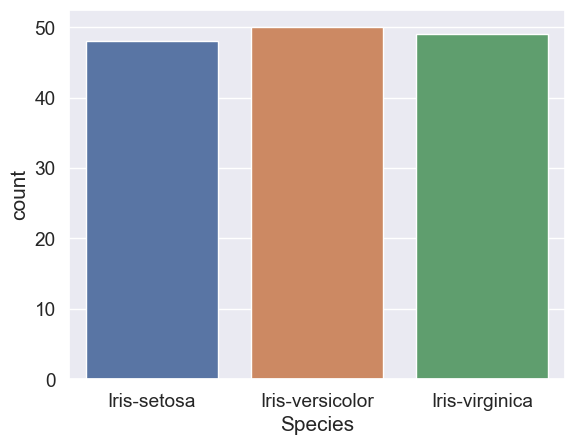

In [18]:
sns.countplot(x = df['Species'] , data = df)

In [19]:
#PetalWidthCm

df['PetalWidthCm'].nunique()

22

     PetalWidthCm
0.2            28
1.3            13
1.8            12
1.5            12
1.4             8
2.3             8
1.0             7
0.4             7
0.3             7
2.1             6
2.0             6
1.2             5
0.1             4
1.6             4
1.9             4
2.5             3
2.2             3
2.4             3
1.1             3
1.7             2
0.6             1
0.5             1


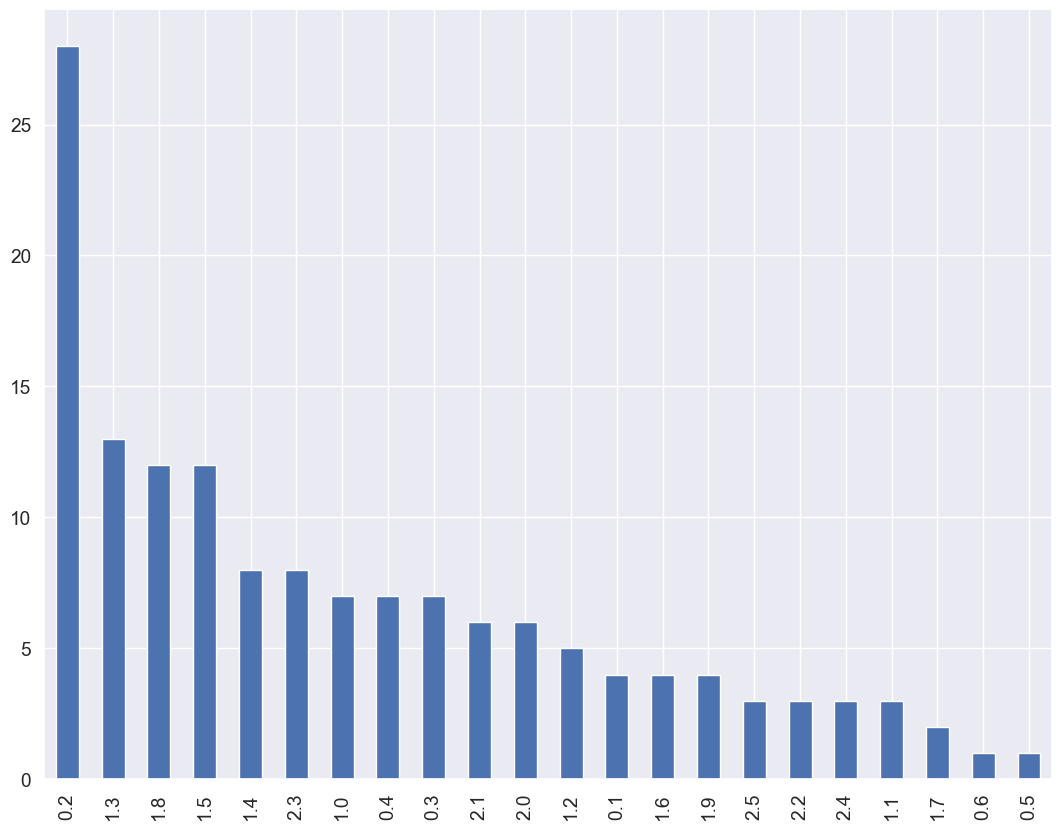

In [20]:
plt.figure(figsize=(13,10))
print(df['PetalWidthCm'].value_counts().to_frame())
df['PetalWidthCm'].value_counts().plot.bar()
plt.show()

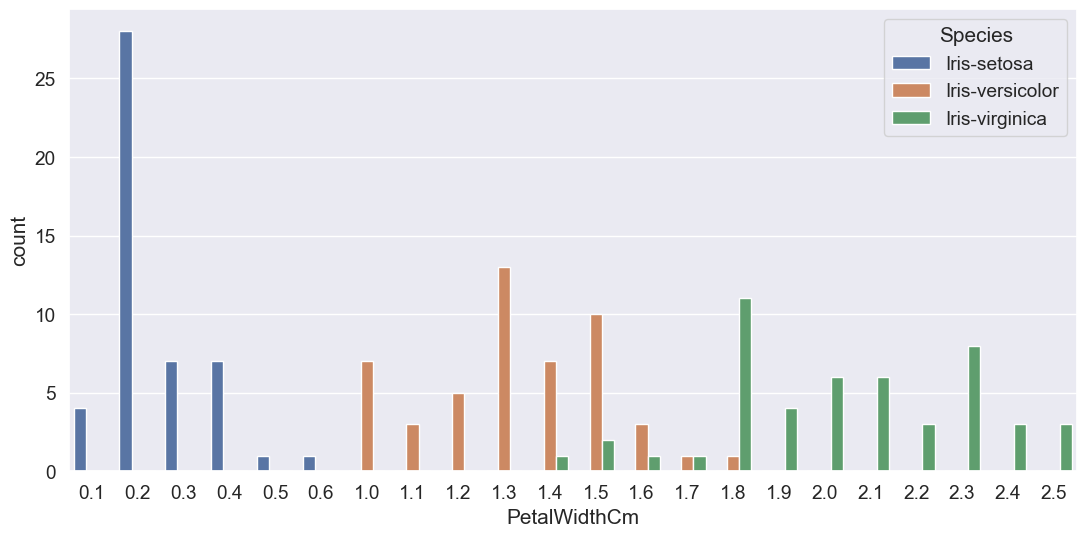

In [21]:
plt.figure(figsize=(13,6))
sns.countplot(x="PetalWidthCm", data=df, hue="Species")
plt.show()

In [22]:
#SepalLengthCm

df['SepalLengthCm'].nunique()

35

     SepalLengthCm
5.0             10
5.1              9
6.3              9
6.7              8
5.7              8
5.5              7
6.4              7
5.8              6
5.4              6
6.1              6
6.0              6
5.6              6
4.8              5
6.5              5
4.9              4
6.2              4
7.7              4
6.9              4
4.6              4
5.2              4
5.9              3
4.4              3
7.2              3
6.8              3
6.6              2
4.7              2
7.6              1
7.4              1
7.3              1
7.0              1
7.1              1
5.3              1
4.3              1
4.5              1
7.9              1


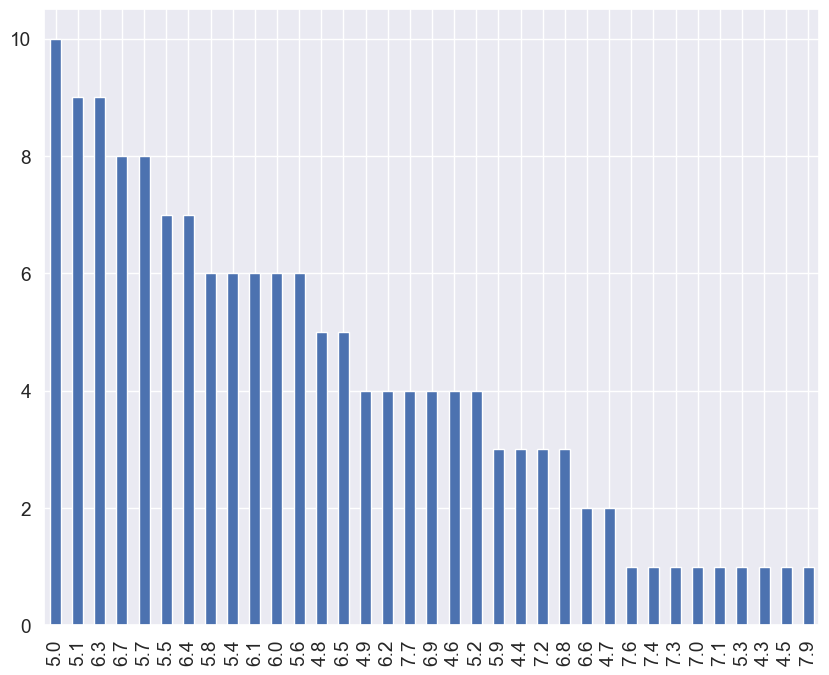

In [23]:
plt.figure(figsize=(10,8))
print(df['SepalLengthCm'].value_counts().to_frame())
df['SepalLengthCm'].value_counts().plot.bar()
plt.show()

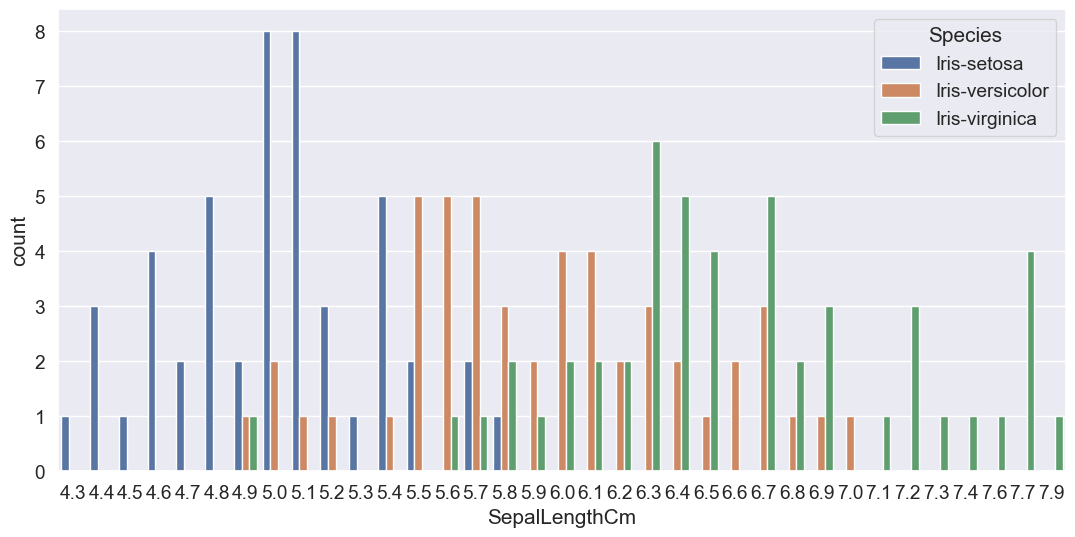

In [24]:
plt.figure(figsize=(13,6))
sns.countplot(x="SepalLengthCm", data=df, hue="Species")
plt.show()

In [25]:
#SepalWidthCm

df['SepalWidthCm'].nunique()

23

     SepalWidthCm
3.0            26
2.8            14
3.2            13
3.4            12
3.1            10
2.9            10
2.5             8
2.7             8
3.5             6
3.3             6
3.8             6
2.6             5
2.3             4
3.7             3
2.4             3
2.2             3
3.6             3
3.9             2
4.4             1
4.0             1
4.1             1
4.2             1
2.0             1


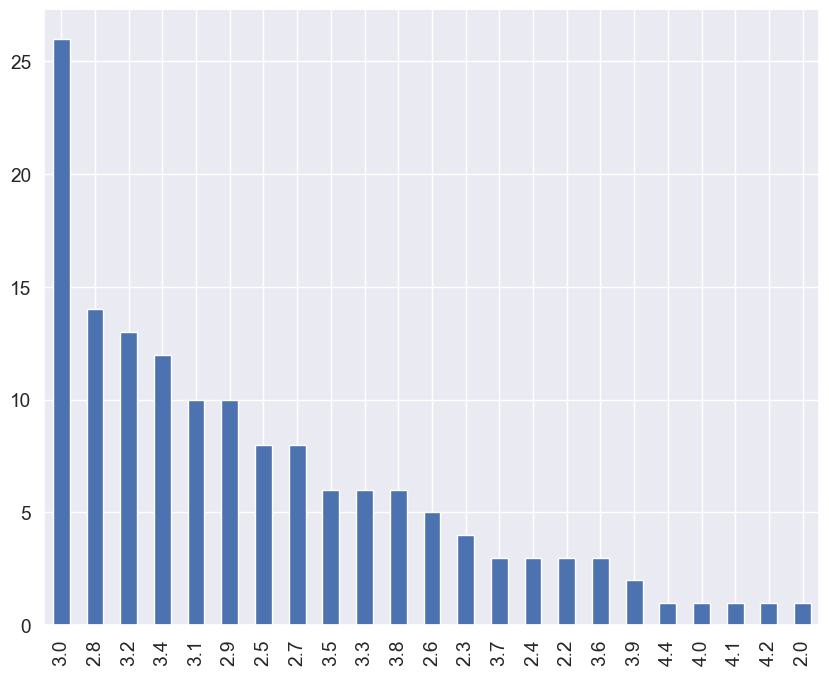

In [26]:
plt.figure(figsize=(10,8))
print(df['SepalWidthCm'].value_counts().to_frame())
df['SepalWidthCm'].value_counts().plot.bar()
plt.show()

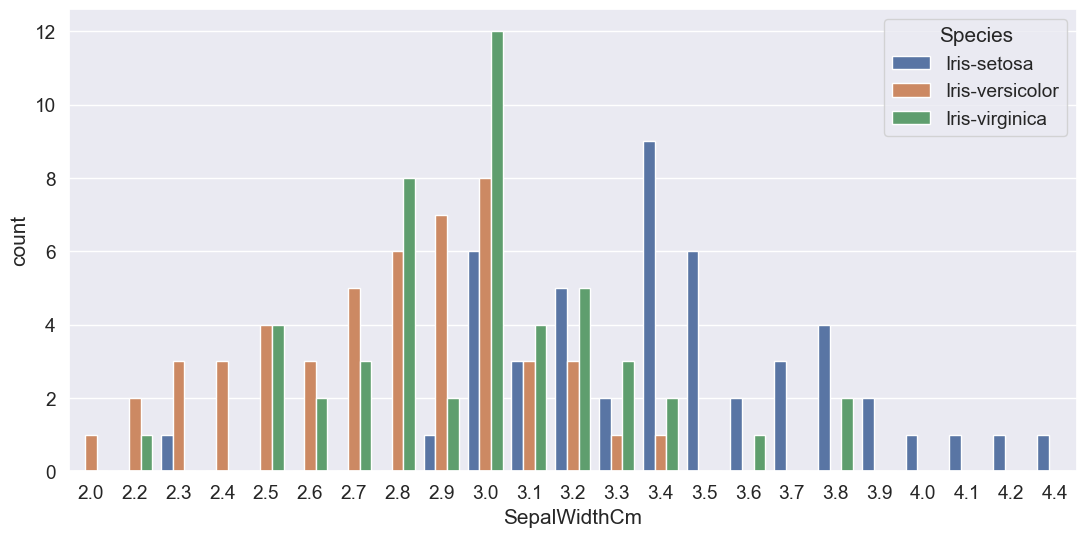

In [27]:
plt.figure(figsize=(13,6))
sns.countplot(x="SepalWidthCm", data=df, hue="Species")
plt.show()

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

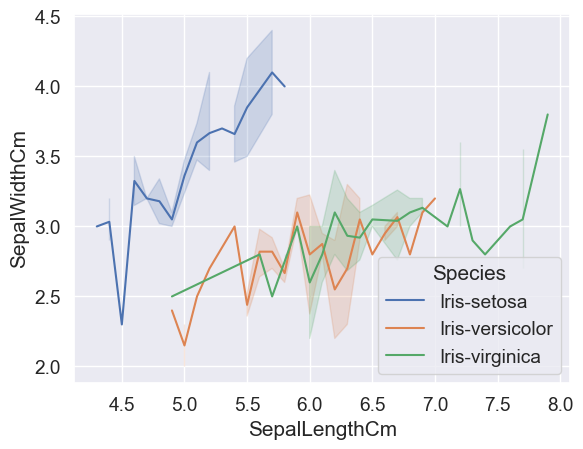

In [28]:
sns.lineplot(x = "SepalLengthCm", y = "SepalWidthCm", data = df, hue = "Species")

In [29]:
#PetalLengthCm

df['PetalLengthCm'].nunique()

43

     PetalLengthCm
1.4             12
1.5             12
4.5              8
1.6              7
5.1              7
1.3              7
5.6              6
4.7              5
4.9              5
4.0              5
4.2              4
5.0              4
4.4              4
4.8              4
1.7              4
3.9              3
4.6              3
5.7              3
4.1              3
5.5              3
6.1              3
5.8              3
3.3              2
5.4              2
6.7              2
5.3              2
5.9              2
6.0              2
1.2              2
4.3              2
1.9              2
3.5              2
5.2              2
3.0              1
1.1              1
3.7              1
3.8              1
6.6              1
6.3              1
1.0              1
6.9              1
3.6              1
6.4              1


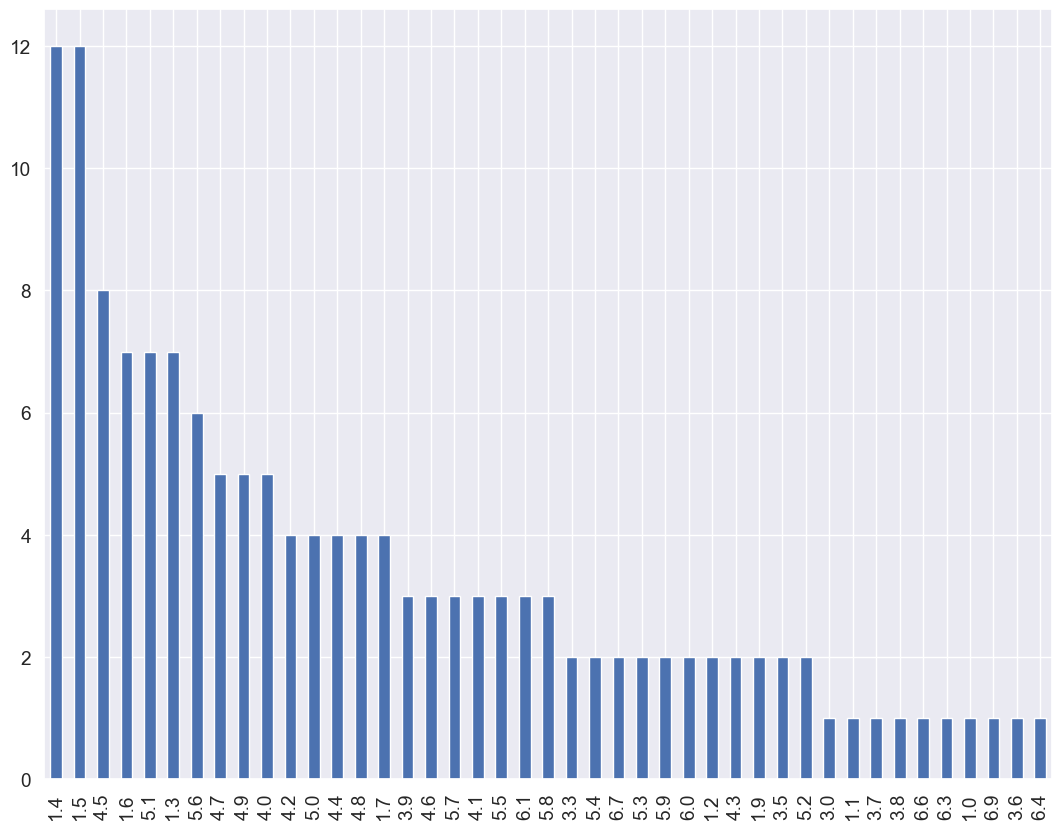

In [30]:
plt.figure(figsize=(13,10))
print(df['PetalLengthCm'].value_counts().to_frame())
df['PetalLengthCm'].value_counts().plot.bar()
plt.show()

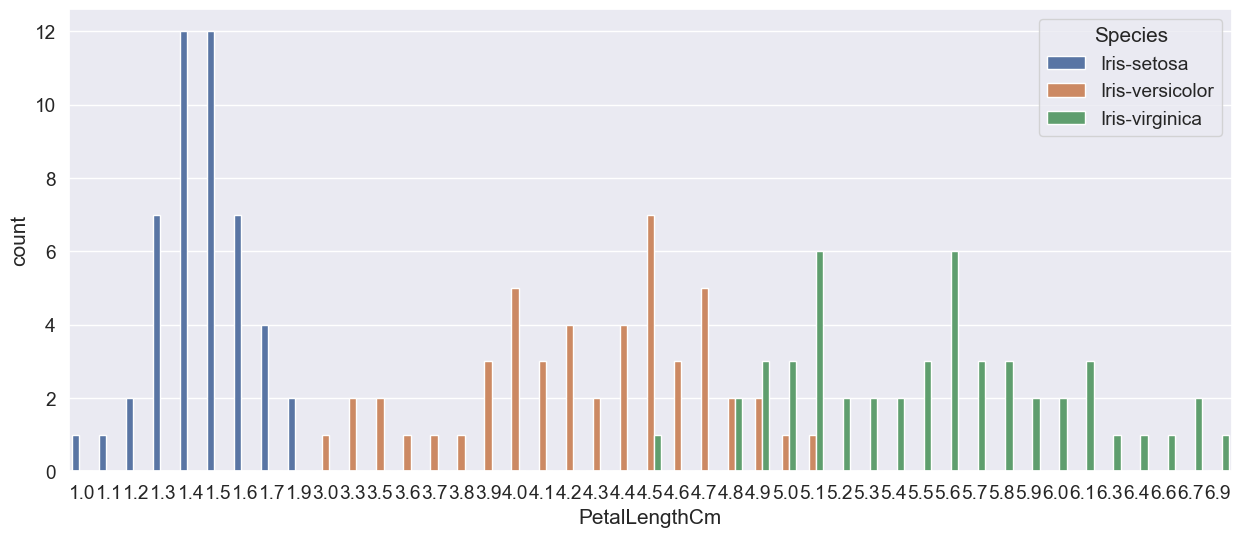

In [31]:
plt.figure(figsize=(15,6))
sns.countplot(x="PetalLengthCm", data=df, hue="Species")
plt.show()

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

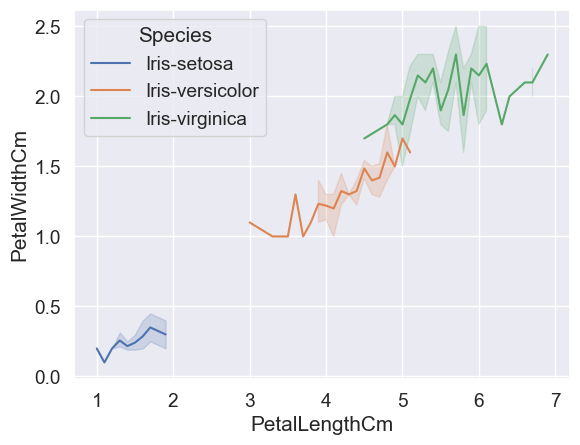

In [32]:
sns.lineplot(x = "PetalLengthCm", y = "PetalWidthCm", data = df, hue = "Species")

In [33]:
#Species

df['Species'].nunique()
df['Species'].unique().tolist()

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

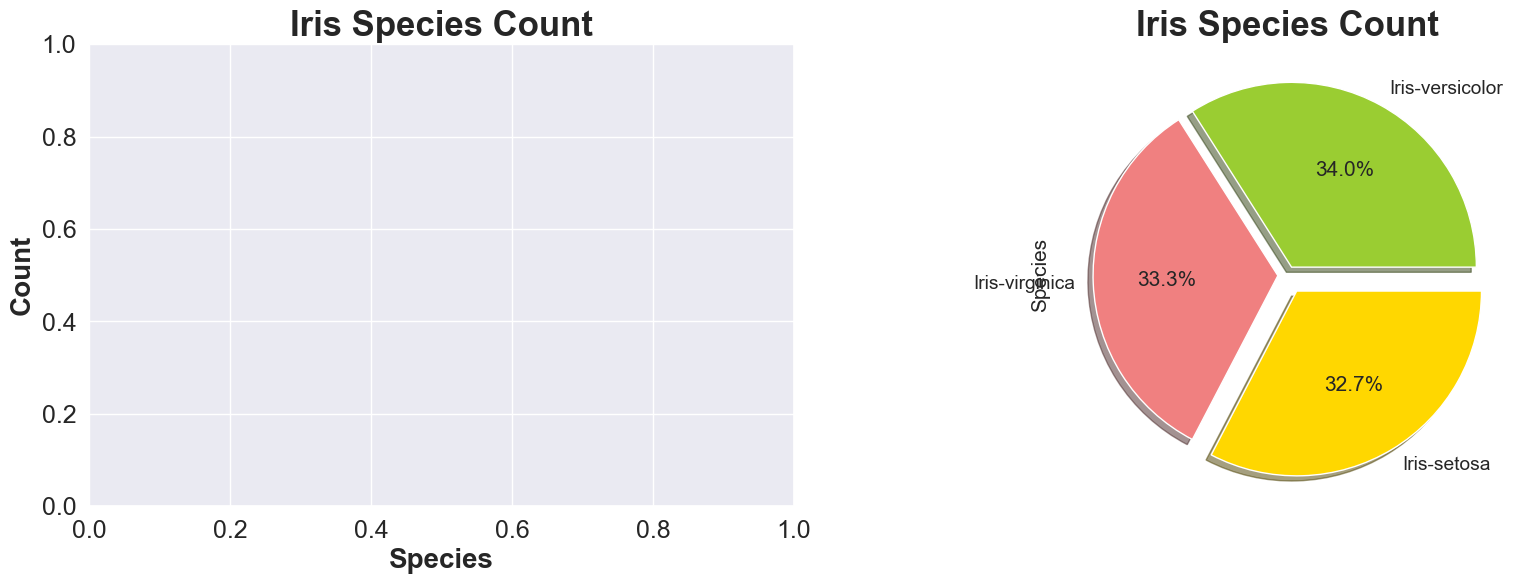

In [34]:
plt.figure(figsize=(20, 6))

cols = ['yellowgreen', 'lightcoral','gold']
plt.subplot(1,2,1)
plt.title('Iris Species Count',fontweight="bold", size=25)
plt.xticks(size=18)
plt.yticks(size=18)
plt.xlabel('Species', fontsize=20, fontweight='bold')
plt.ylabel('Count', fontsize=20, fontweight='bold')

plt.subplot(1,2,2)
df['Species'].value_counts().plot.pie(explode=[0.05,0.05,0.1],autopct='%1.1f%%',shadow=True, colors=cols)
plt.title('Iris Species Count',fontweight="bold", size=25)

plt.show()

<Figure size 1000x800 with 0 Axes>

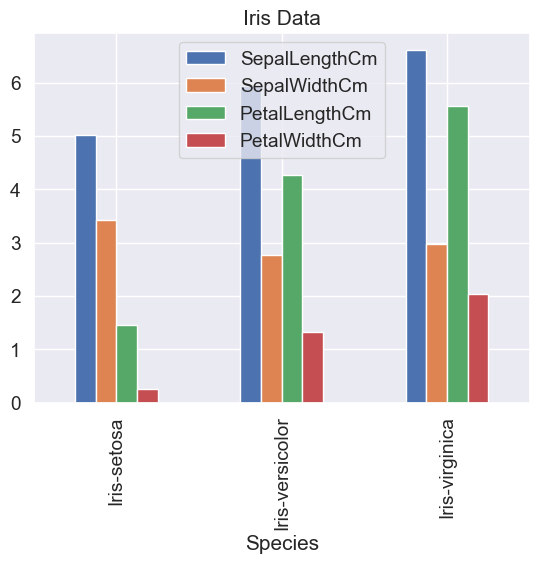

In [35]:
df_Species = df.groupby(df['Species']).mean()

plt.figure(figsize=(10,8))
df_Species.plot.bar()
plt.title('Iris Data')
plt.show()

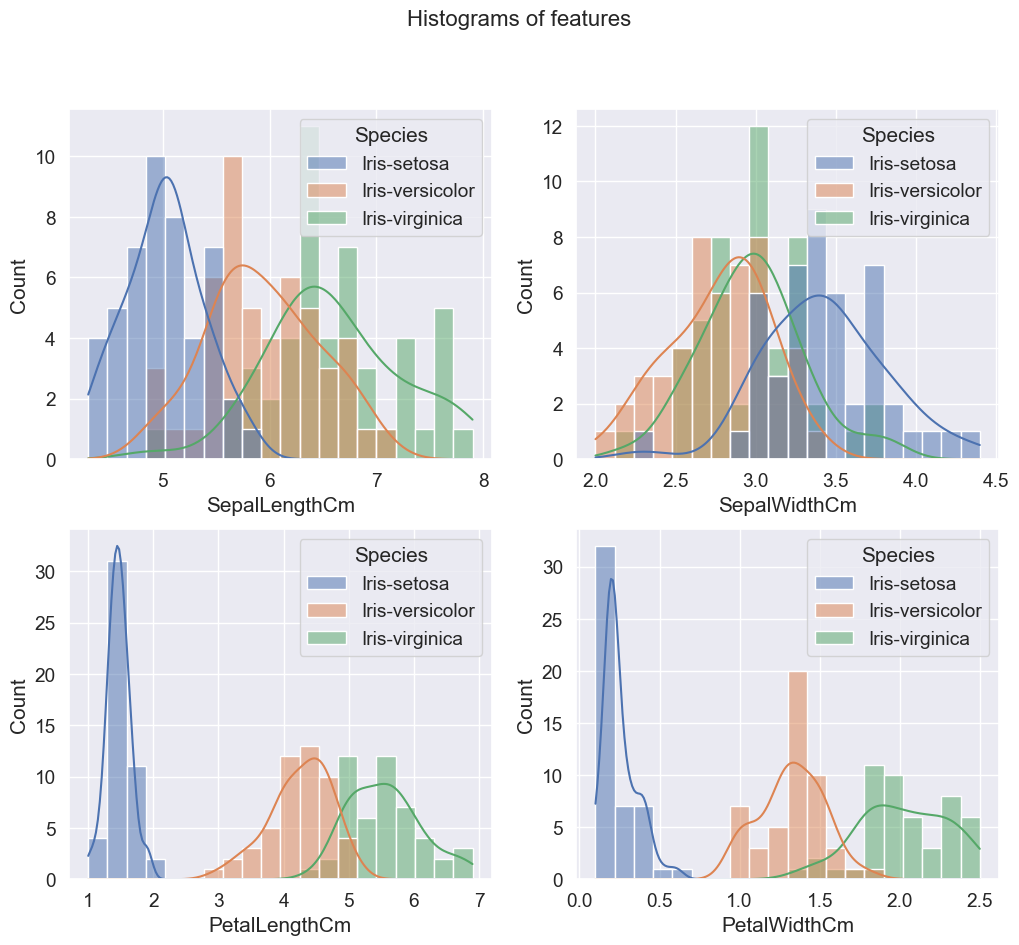

In [36]:
num_columns = list(df.select_dtypes(include=['float']).columns)
num=int(len(num_columns)/2) if int(len(num_columns)/2)>1 else 2
fig ,ax = plt.subplots(num,num,figsize=(12,10))
for j in range(num):
    for i in range(num):
        try:
            sns.histplot(data=df,x=num_columns[0],kde=True,bins=20,hue='Species',ax=ax[j][i])
            num_columns.pop(0)
        except:
            fig.delaxes(ax=ax[j][i])
fig.suptitle('Histograms of features', fontsize=16)
plt.show()

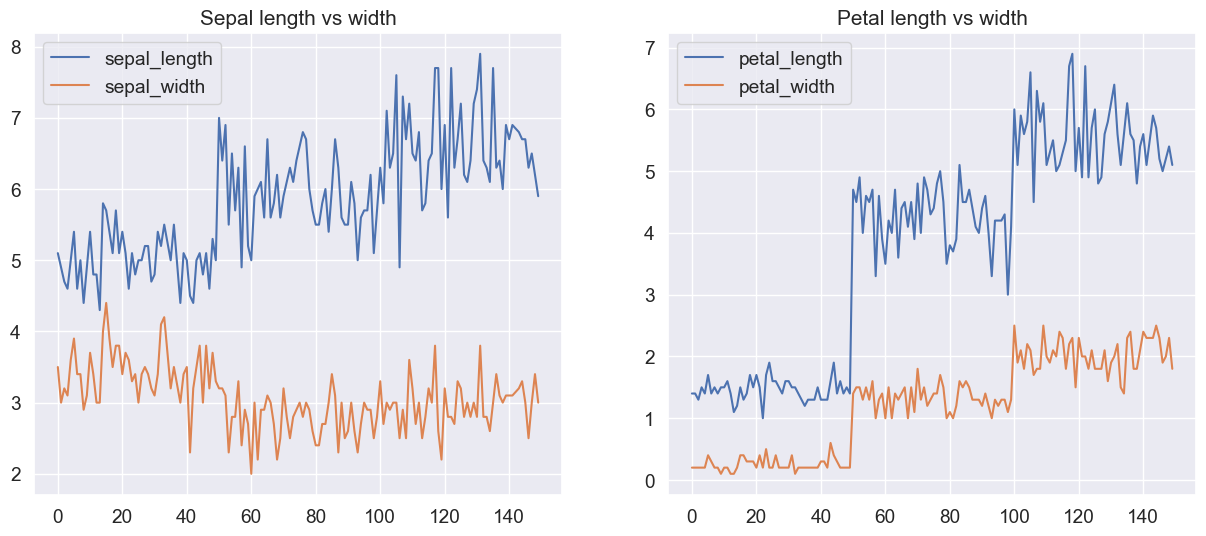

In [37]:
fig,ax = plt.subplots(1,2,figsize=(15,6))
ax[0].plot(df['SepalLengthCm'])
ax[0].plot(df['SepalWidthCm'])
ax[0].set_title('Sepal length vs width')
ax[0].legend(['sepal_length','sepal_width'])
ax[1].plot(df['PetalLengthCm'])
ax[1].plot(df['PetalWidthCm'])
ax[1].set_title('Petal length vs width')
ax[1].legend(['petal_length','petal_width'])
plt.show()

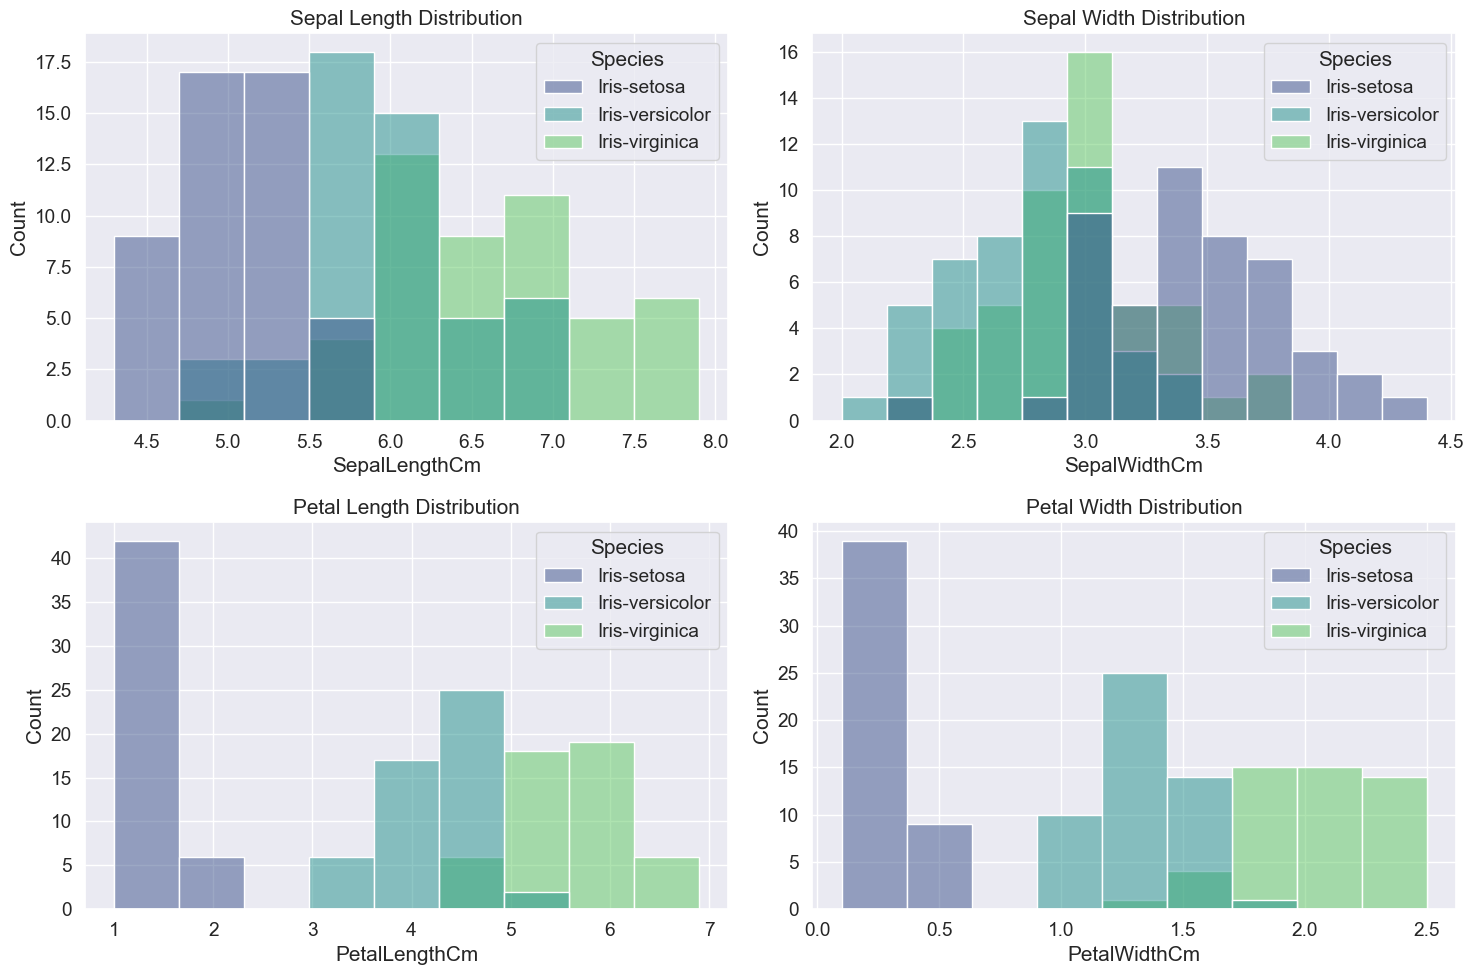

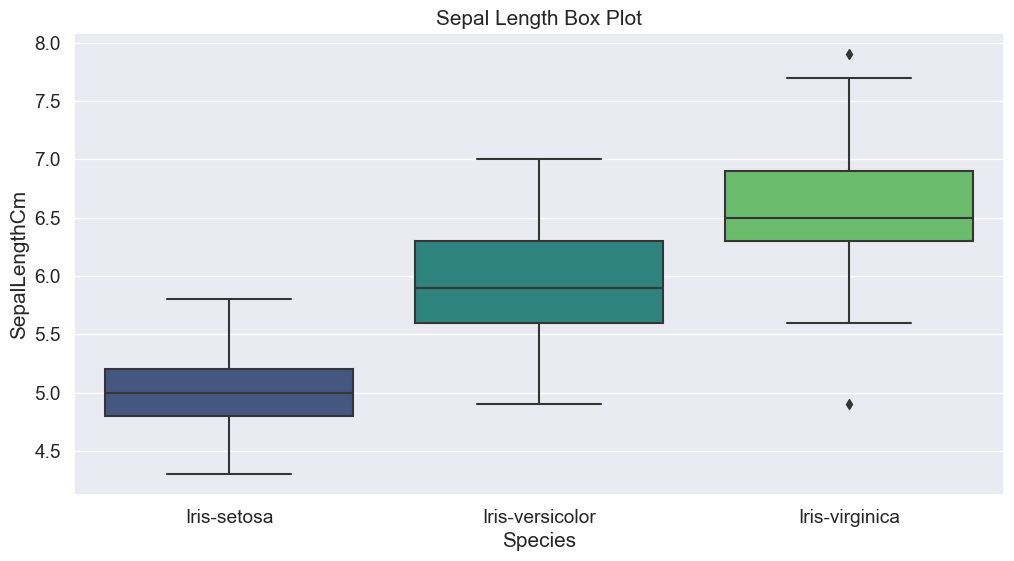

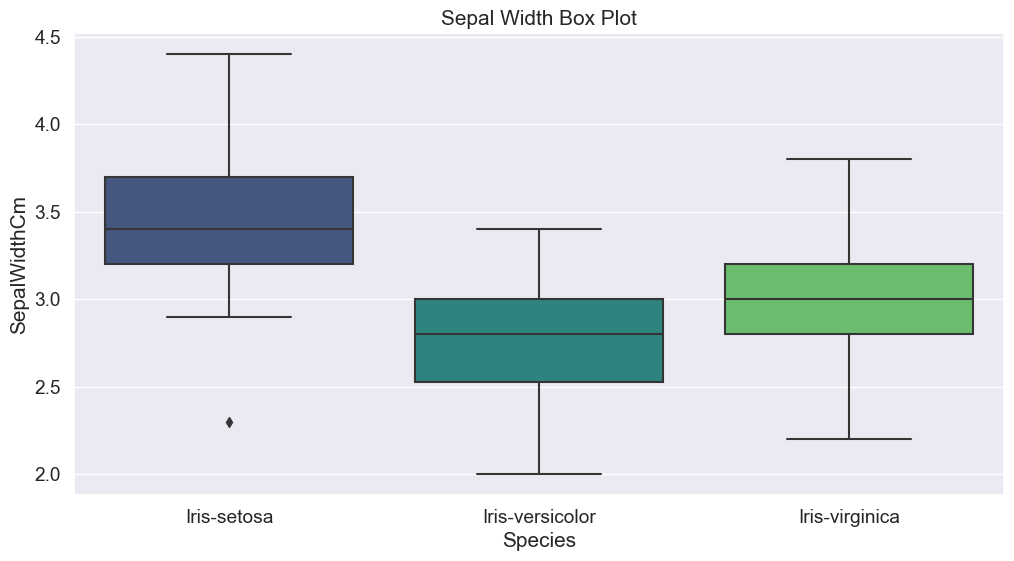

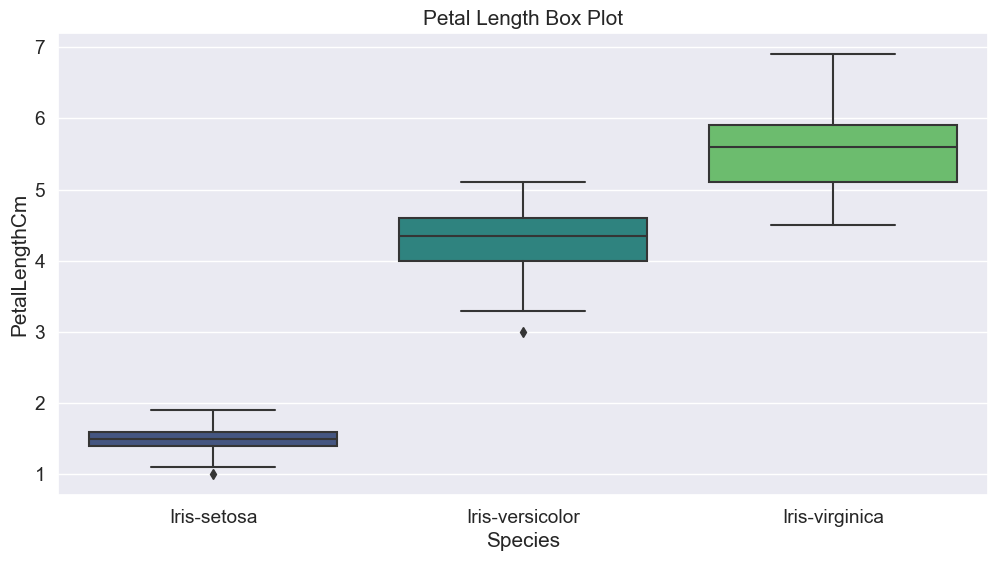

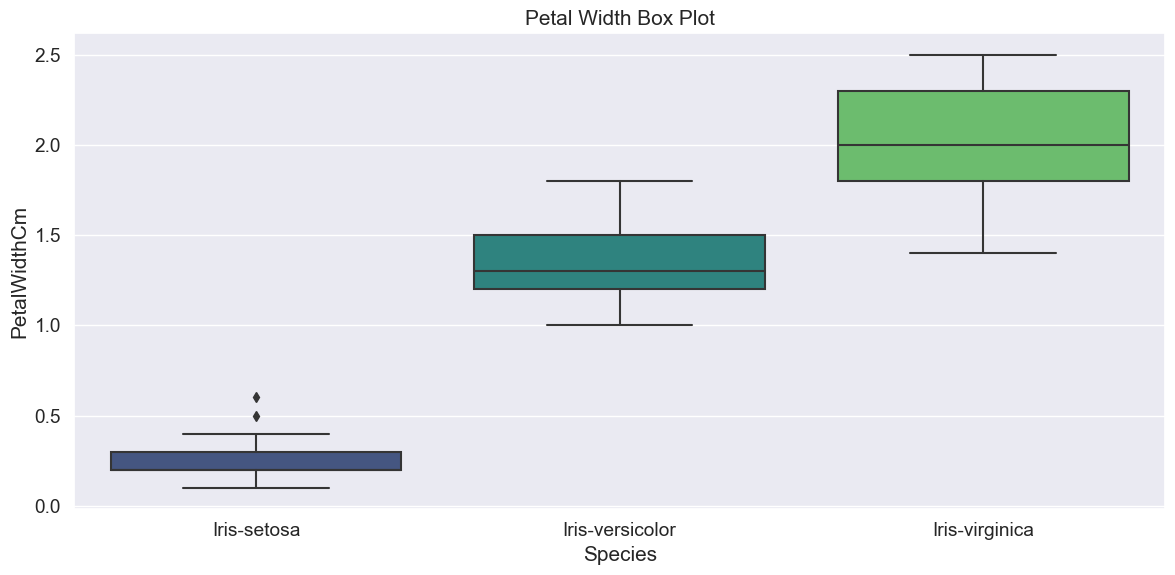

In [38]:
# Data Visualization

palette = "viridis"

plt.figure(figsize=(15, 10))

# Histograms for sepal length, sepal width, petal length, and petal width
plt.subplot(2, 2, 1)
sns.histplot(data=df, x="SepalLengthCm", hue="Species", palette=palette)
plt.title("Sepal Length Distribution")

plt.subplot(2, 2, 2)
sns.histplot(data=df, x="SepalWidthCm", hue="Species", palette=palette)
plt.title("Sepal Width Distribution")

plt.subplot(2, 2, 3)
sns.histplot(data=df, x="PetalLengthCm", hue="Species", palette=palette)
plt.title("Petal Length Distribution")

plt.subplot(2, 2, 4)
sns.histplot(data=df, x="PetalWidthCm", hue="Species", palette=palette)
plt.title("Petal Width Distribution")

plt.tight_layout()

# Box plots for each feature
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Species", y="SepalLengthCm", palette=palette)
plt.title("Sepal Length Box Plot")

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Species", y="SepalWidthCm", palette=palette)
plt.title("Sepal Width Box Plot")

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Species", y="PetalLengthCm", palette=palette)
plt.title("Petal Length Box Plot")

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Species", y="PetalWidthCm", palette=palette)
plt.title("Petal Width Box Plot")

plt.tight_layout()

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

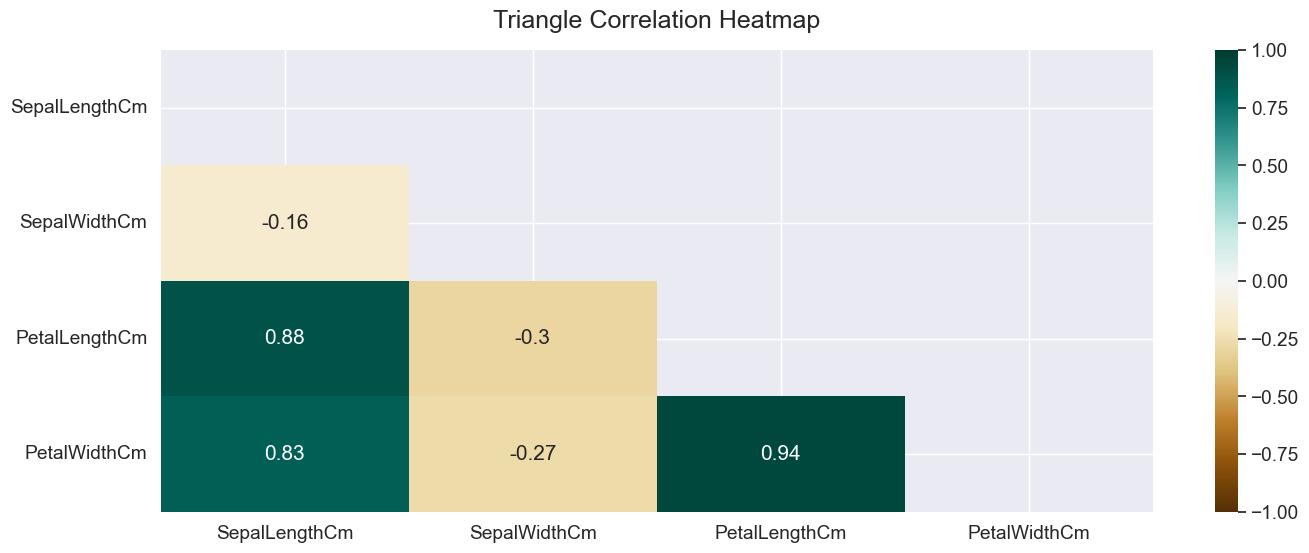

In [39]:
plt.figure (figsize = (16 , 6))

mask = np.triu(np.ones_like(df.corr(method = "spearman") , dtype = bool))
heatmap = sns.heatmap(df.corr(method = "spearman") , mask = mask , vmin = -1 , vmax = 1 ,
                      annot = True , cmap="BrBG")
heatmap.set_title("Triangle Correlation Heatmap" , fontdict = {'fontsize': 18} , pad =16 )

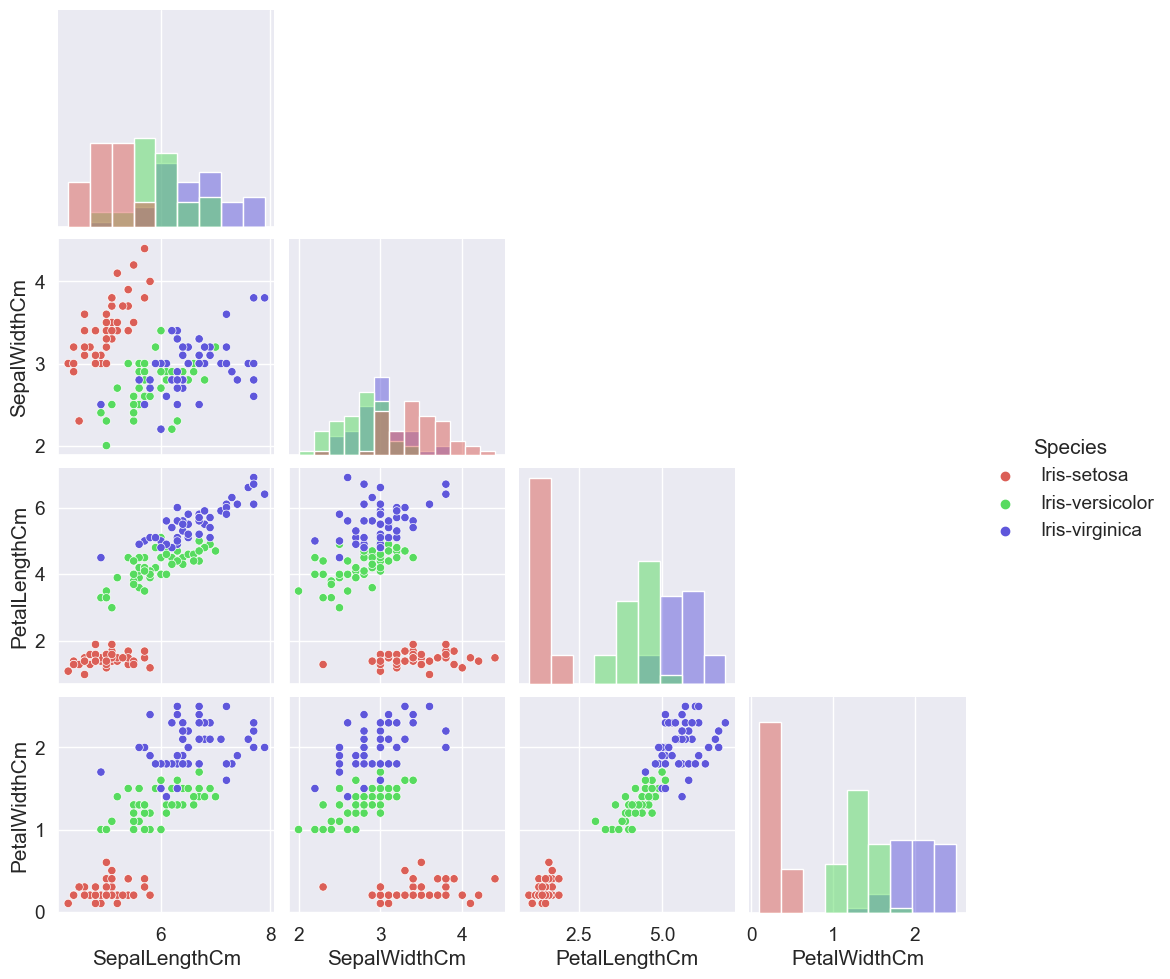

In [40]:
sns.pairplot(df , hue='Species' , diag_kind="hist" , corner=True , palette = 'hls')

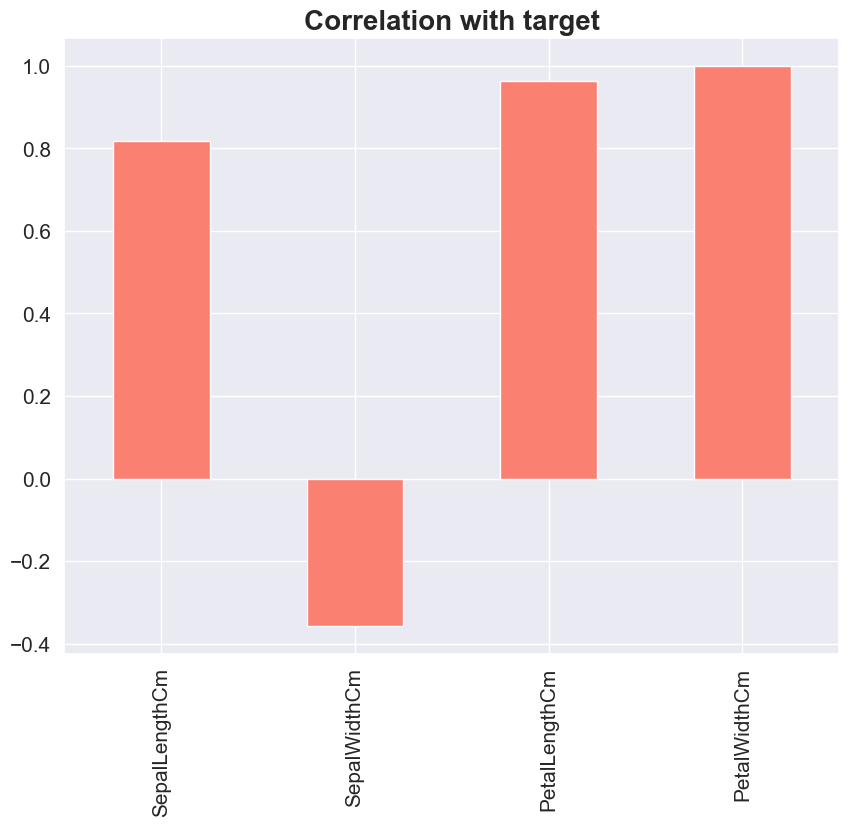

In [41]:
a = df.drop('Species', axis=1)
a.corrwith(df['PetalWidthCm']).plot(kind='bar', grid=True, figsize=(10,8), color='salmon')
plt.title("Correlation with target", fontweight='bold', size=20)
plt.xticks(size=15, rotation=90)
plt.yticks(size=15)
plt.show()

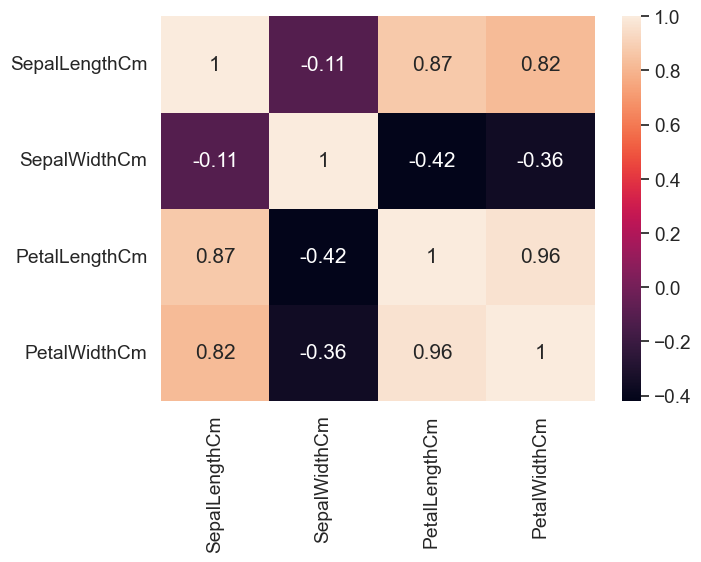

In [42]:
plt.figure(figsize=(7,5))
# Plotting the heatmap
sns.heatmap(df.corr(), annot=True)
plt.show()

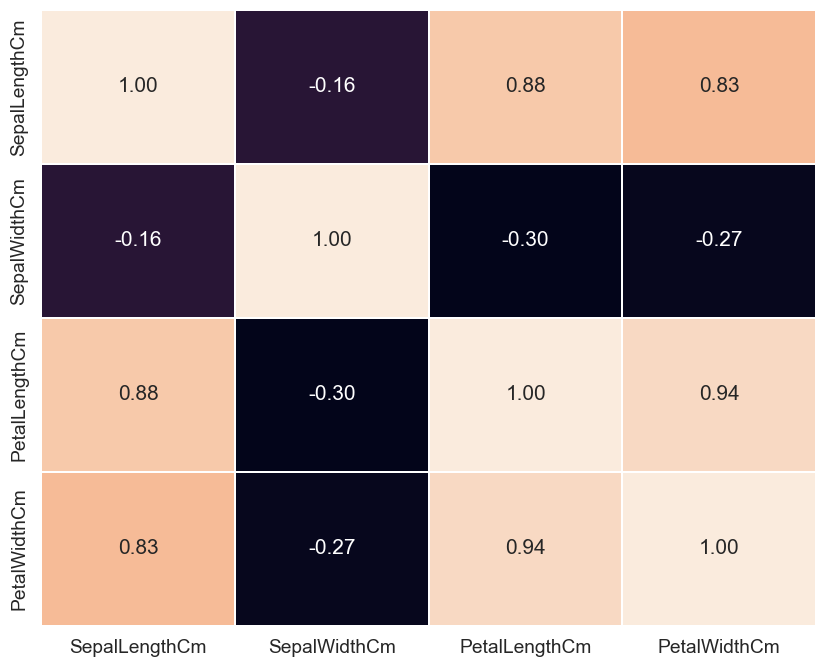

In [43]:
# Spearman Correlation
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(method='spearman'), cbar=False, annot=True, fmt='.2f', linewidth=0.2);

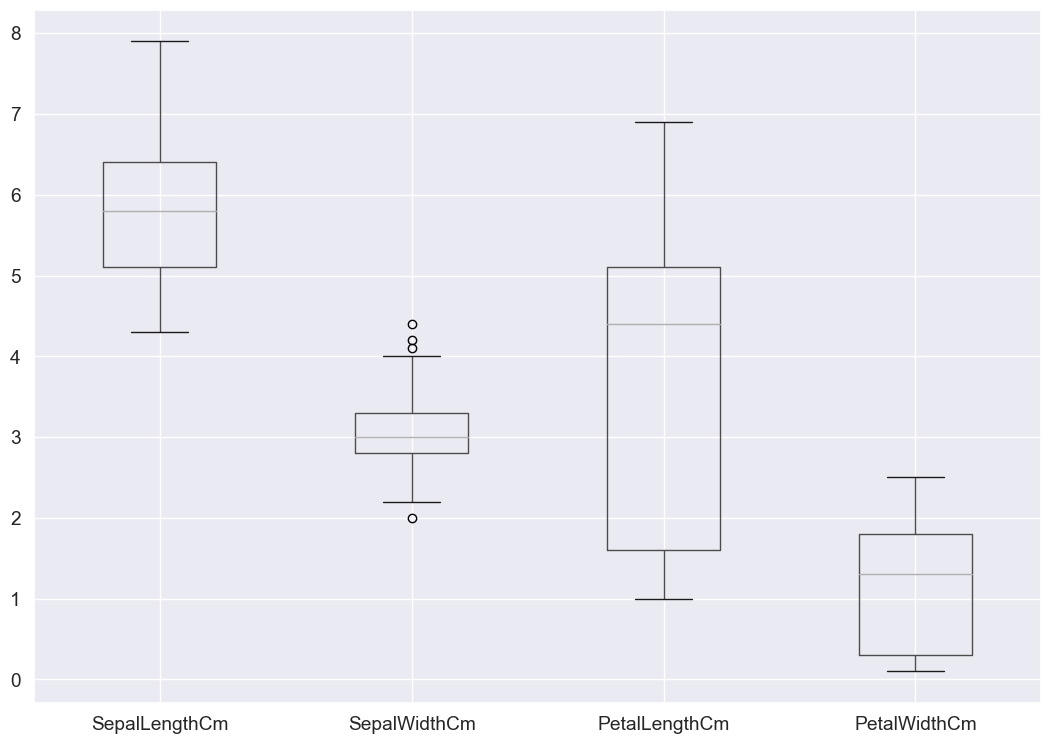

In [44]:
plt.figure(figsize = (13, 9)) 
df.boxplot()
plt.show()

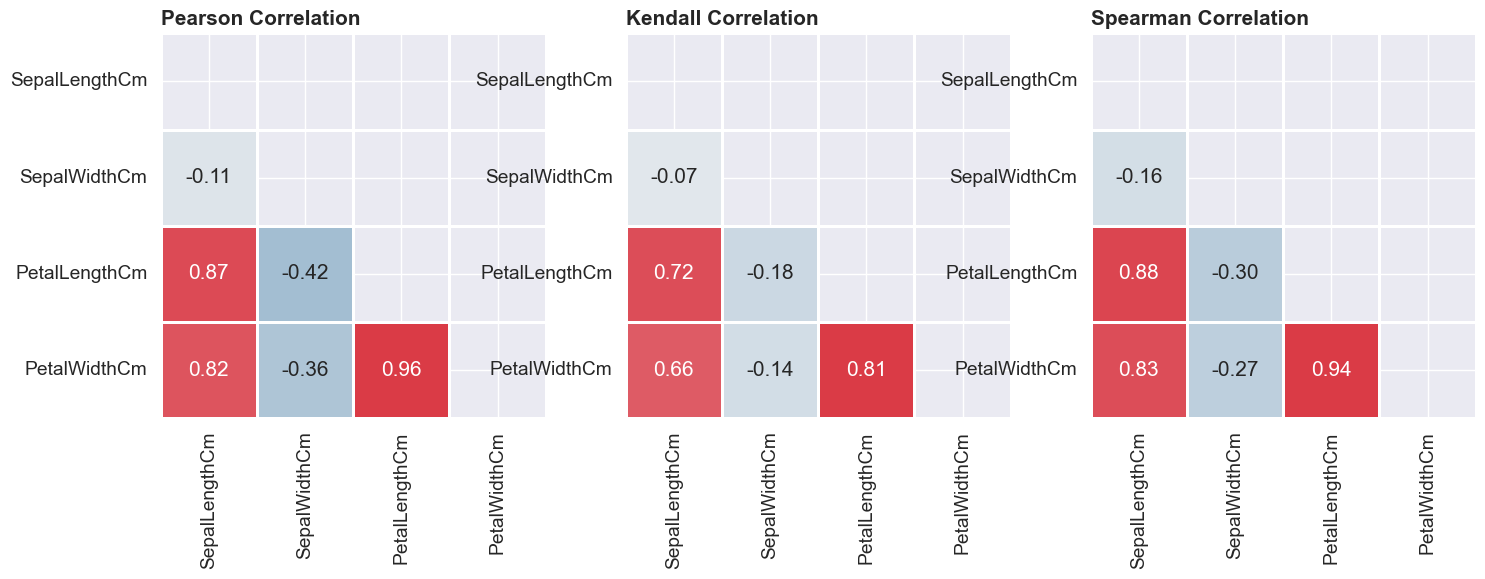

In [45]:
# kendall
fig, ax = plt.subplots(1, 3, figsize=(17 , 5))

feature_lst = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

corr = df[feature_lst].corr()

mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True


for idx, method in enumerate(['pearson', 'kendall', 'spearman']):
    sns.heatmap(df[feature_lst].corr(method=method), ax=ax[idx],
            square=True, annot=True, fmt='.2f', center=0, linewidth=2,
            cbar=False, cmap=sns.diverging_palette(240, 10, as_cmap=True),
            mask=mask
           ) 
    ax[idx].set_title(f'{method.capitalize()} Correlation', loc='left', fontweight='bold')     

plt.show()

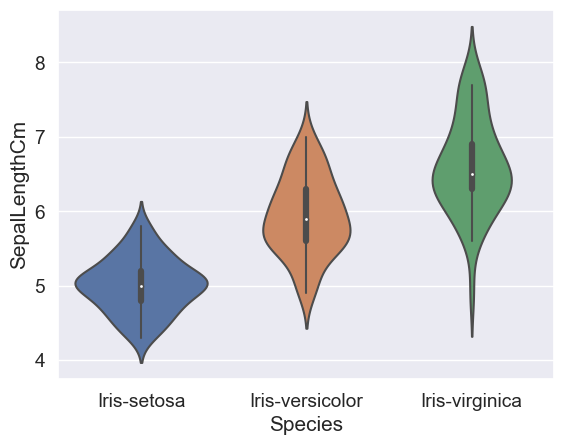

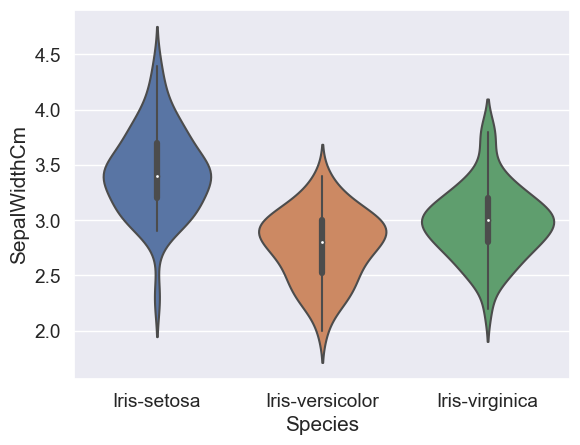

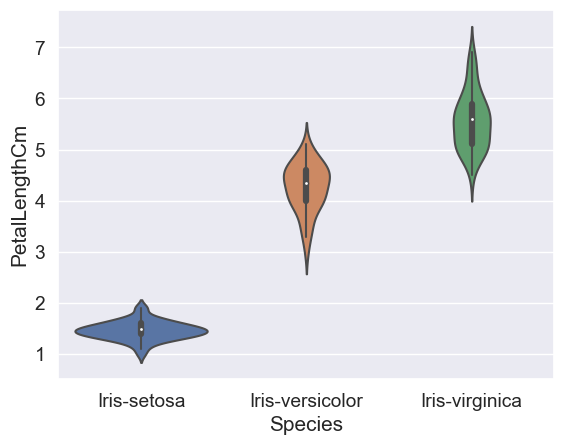

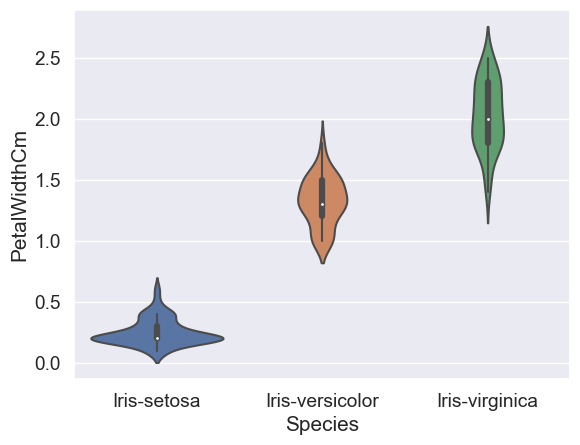

In [46]:
# Plotting the violinplot
sns.violinplot(x='Species', y='SepalLengthCm', data=df)
plt.show()

sns.violinplot(x='Species', y='SepalWidthCm', data=df)
plt.show()

sns.violinplot(x='Species', y='PetalLengthCm', data=df)
plt.show()

sns.violinplot(x='Species', y='PetalWidthCm', data=df)
plt.show()

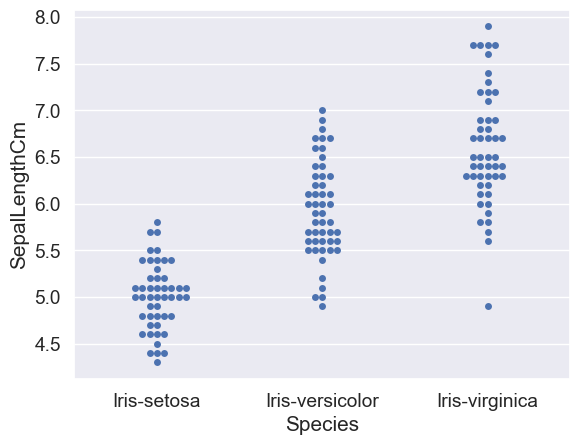

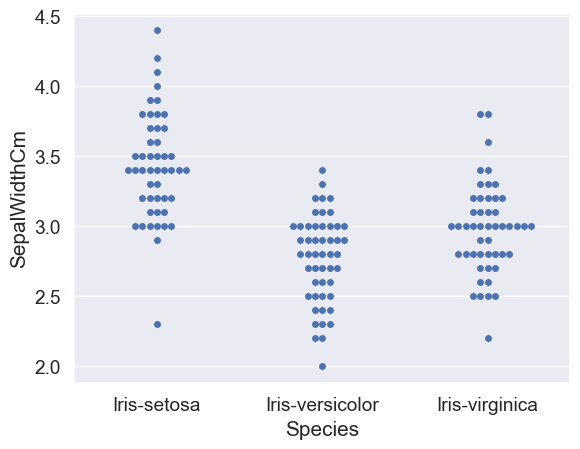

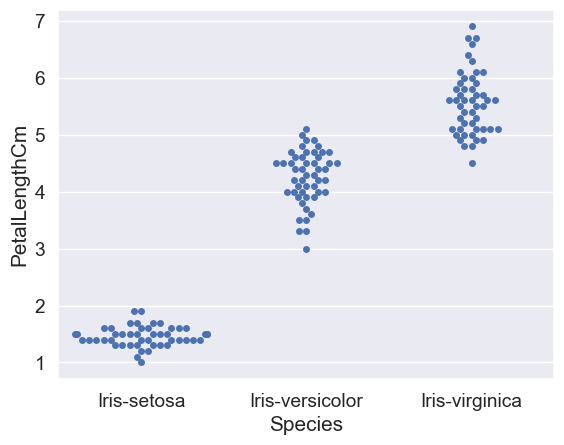

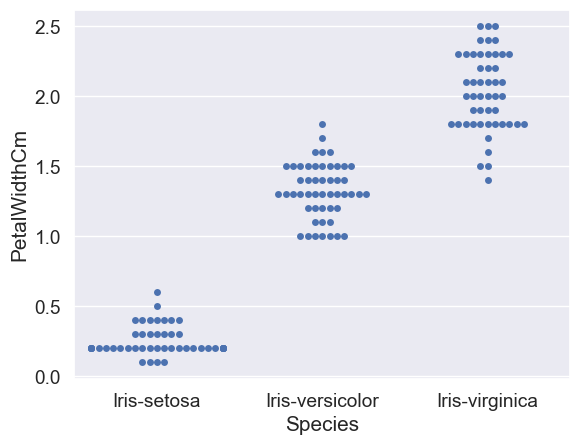

In [47]:
# Plotting the swarmplot
sns.swarmplot(x='Species', y='SepalLengthCm', data=df)
plt.show()
sns.swarmplot(x='Species', y='SepalWidthCm', data=df)
plt.show()
sns.swarmplot(x='Species', y='PetalLengthCm', data=df)
plt.show()
sns.swarmplot(x='Species', y='PetalWidthCm', data=df)
plt.show()

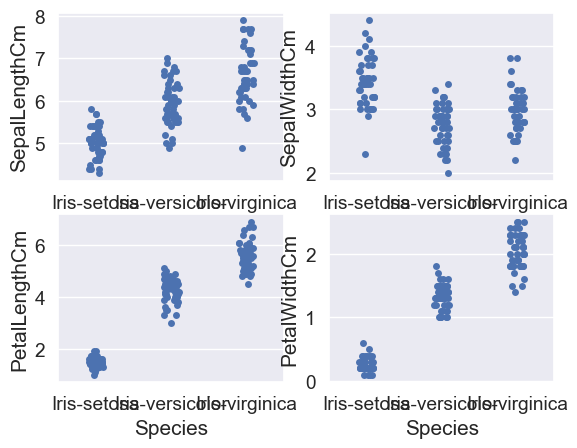

In [48]:
# Plotting the stripplot
# Create a figure with 4 subplots
fig, ax = plt.subplots(2, 2)

# Plot the first stripplot in the top left subplot
sns.stripplot(x='Species', y='SepalLengthCm', data=df, ax=ax[0, 0])

# Plot the second stripplot in the top right subplot
sns.stripplot(x='Species', y='SepalWidthCm', data=df, ax=ax[0, 1])

# Plot the third stripplot in the bottom left subplot
sns.stripplot(x='Species', y='PetalLengthCm', data=df, ax=ax[1, 0])

# Plot the fourth stripplot in the bottom right subplot
sns.stripplot(x='Species', y='PetalWidthCm', data=df, ax=ax[1, 1])

plt.show()

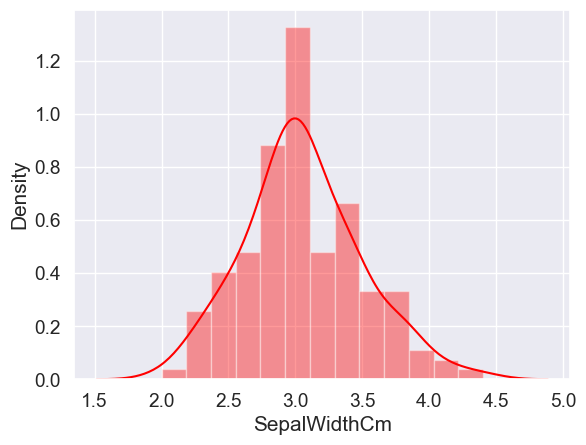

In [49]:
#Univariate Analysis

sns.distplot(df.SepalWidthCm, color = 'red')
plt.show()

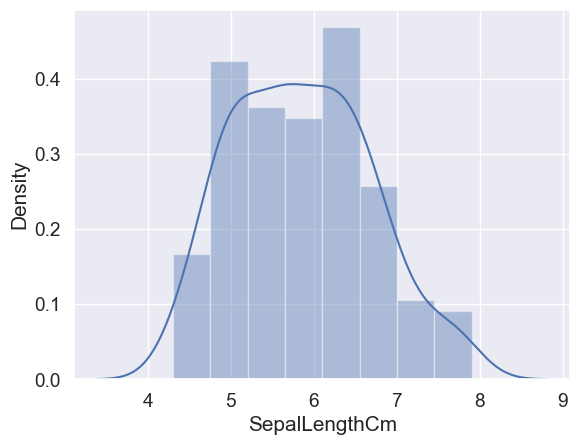

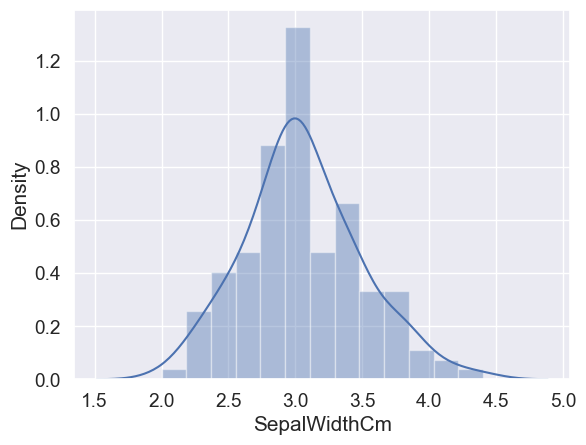

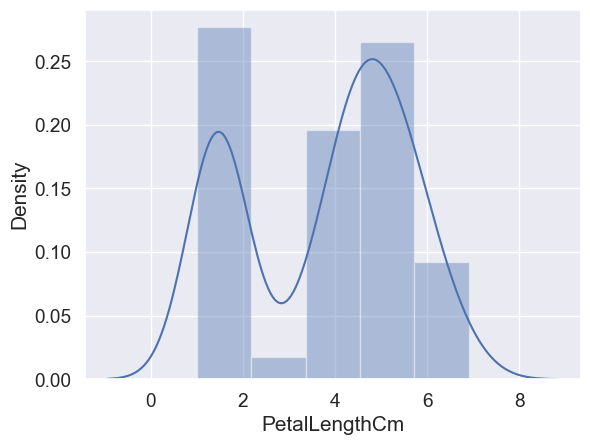

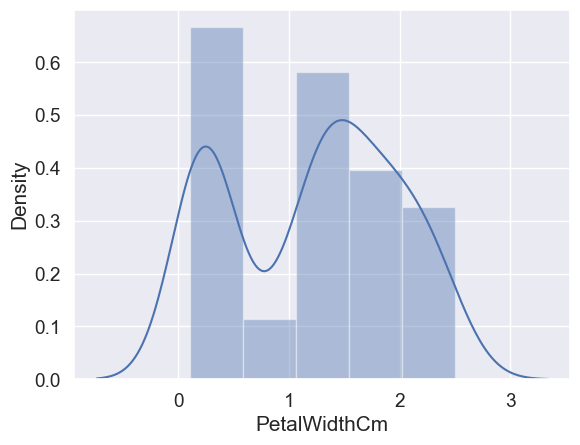

In [50]:
# Plotting the distplot
sns.distplot(df['SepalLengthCm'])
plt.show()

sns.distplot(df['SepalWidthCm'])
plt.show()

sns.distplot(df['PetalLengthCm'])
plt.show()

sns.distplot(df['PetalWidthCm'])
plt.show()

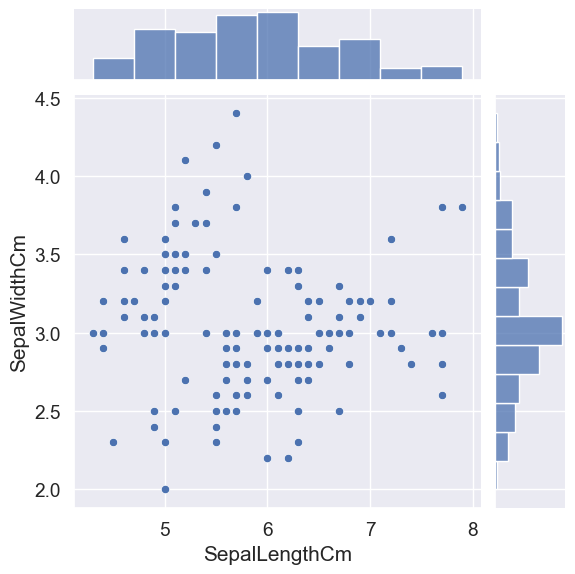

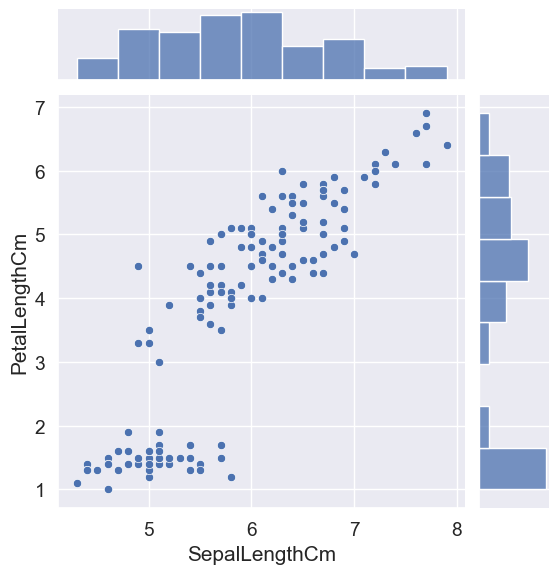

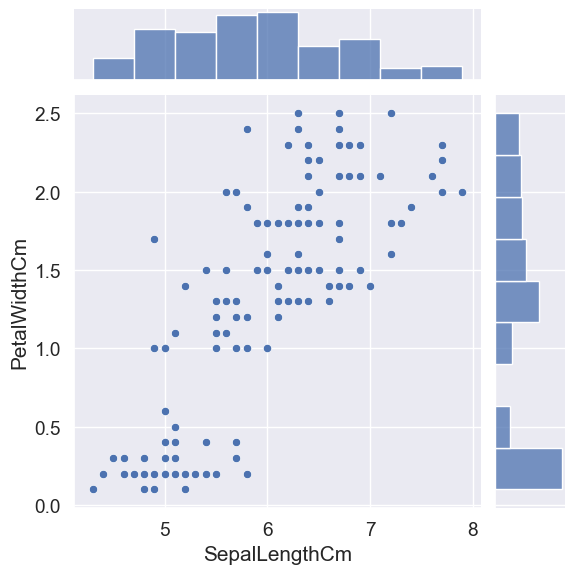

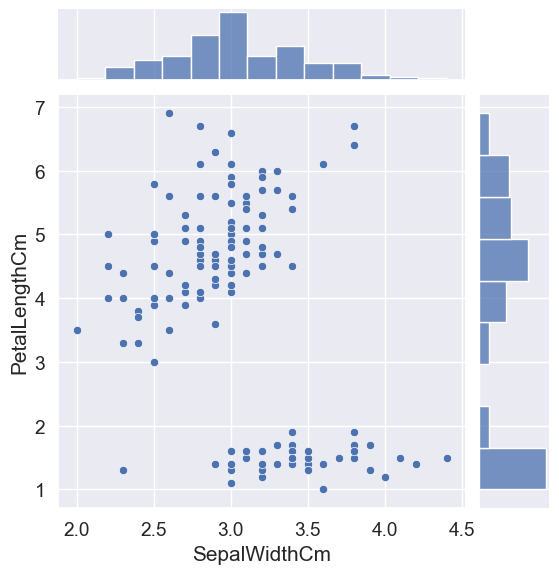

In [51]:
# Plotting the jointplot
sns.jointplot(x='SepalLengthCm', y='SepalWidthCm', data=df)
plt.show()

sns.jointplot(x='SepalLengthCm', y='PetalLengthCm', data=df)
plt.show()

sns.jointplot(x='SepalLengthCm', y='PetalWidthCm', data=df)
plt.show()

sns.jointplot(x='SepalWidthCm', y='PetalLengthCm', data=df)
plt.show()

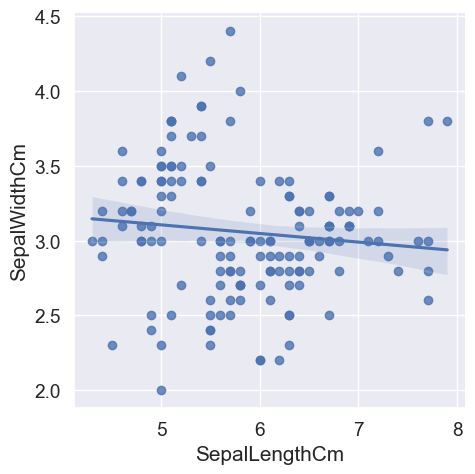

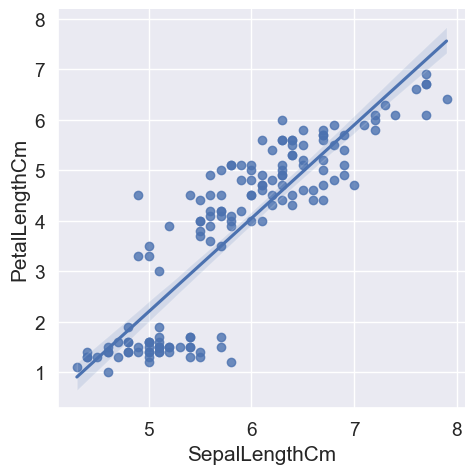

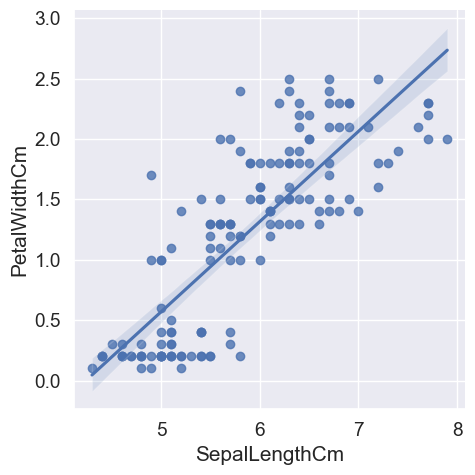

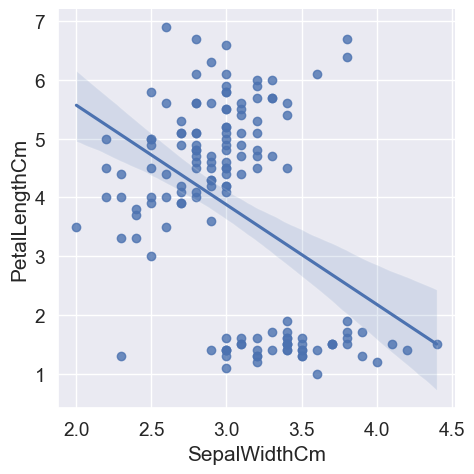

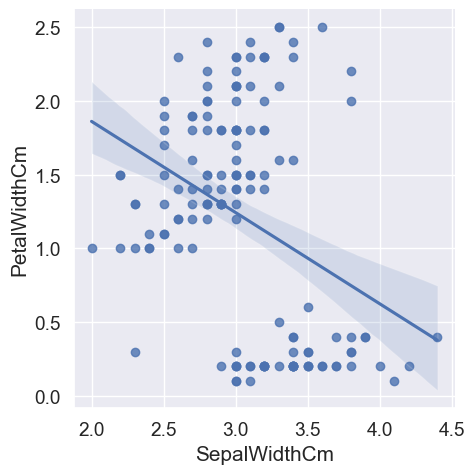

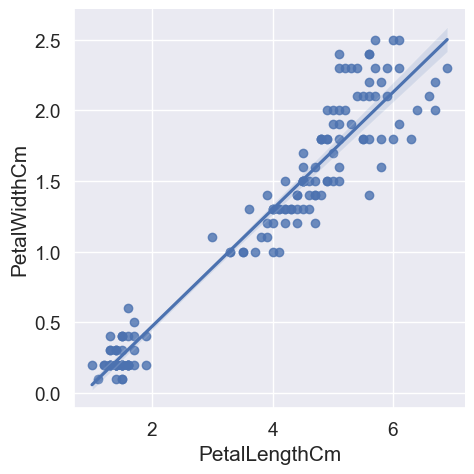

In [52]:
# Plotting the lmplot
sns.lmplot(x='SepalLengthCm', y='SepalWidthCm', data=df)

# Plotting the lmplot
sns.lmplot(x='SepalLengthCm', y='PetalLengthCm', data=df)

# Plotting the lmplot
sns.lmplot(x='SepalLengthCm', y='PetalWidthCm', data=df)

# Plotting the lmplot
sns.lmplot(x='SepalWidthCm', y='PetalLengthCm', data=df)

# Plotting the lmplot
sns.lmplot(x='SepalWidthCm', y='PetalWidthCm', data=df)

# Plotting the lmplot
sns.lmplot(x='PetalLengthCm', y='PetalWidthCm', data=df)

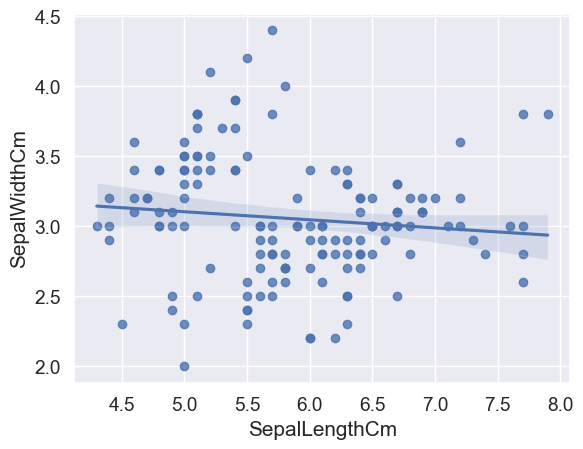

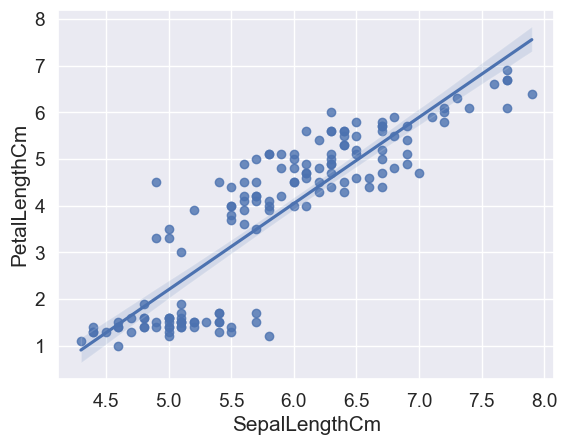

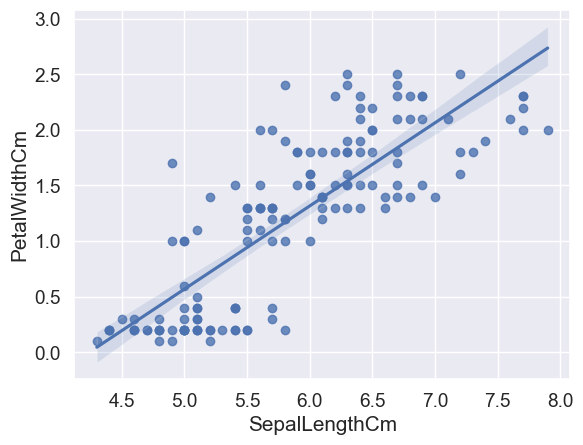

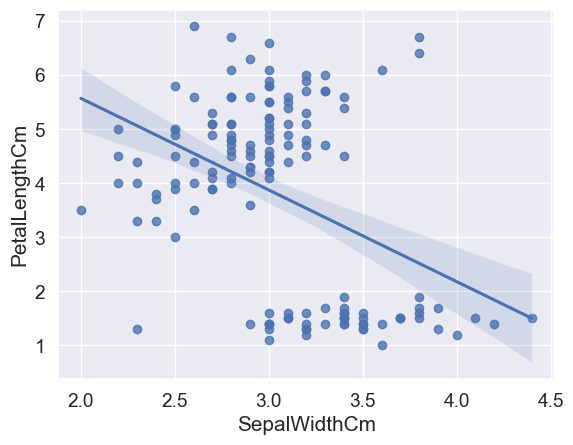

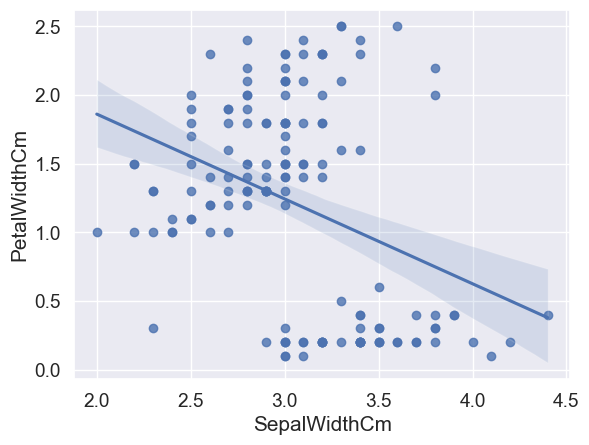

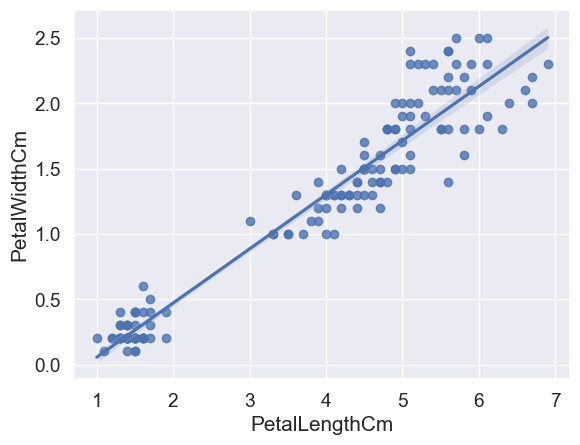

In [53]:
# Plotting the regplot
sns.regplot(x='SepalLengthCm', y='SepalWidthCm', data=df)
plt.show()

sns.regplot(x='SepalLengthCm', y='PetalLengthCm', data=df)
plt.show()

sns.regplot(x='SepalLengthCm', y='PetalWidthCm', data=df)
plt.show()

sns.regplot(x='SepalWidthCm', y='PetalLengthCm', data=df)
plt.show()

sns.regplot(x='SepalWidthCm', y='PetalWidthCm', data=df)
plt.show()

sns.regplot(x='PetalLengthCm', y='PetalWidthCm', data=df)
plt.show()

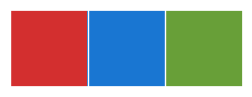

In [54]:
# Bivariate Analysis

# Setting color palette
colors = ['#D32F2F','#1976D2','#689F38']
sns.palplot(sns.color_palette(colors))

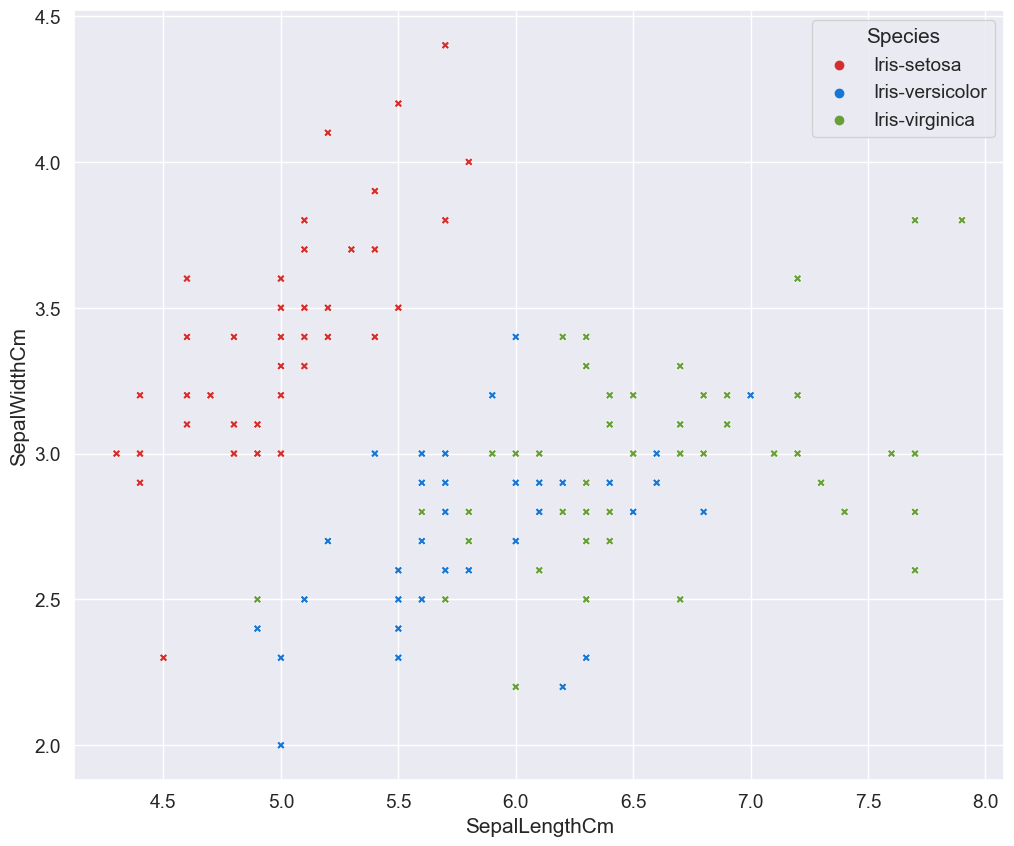

In [55]:
plt.figure(figsize=(12,10))
sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm", hue="Species", data=df, palette=colors, marker="X")
plt.show()

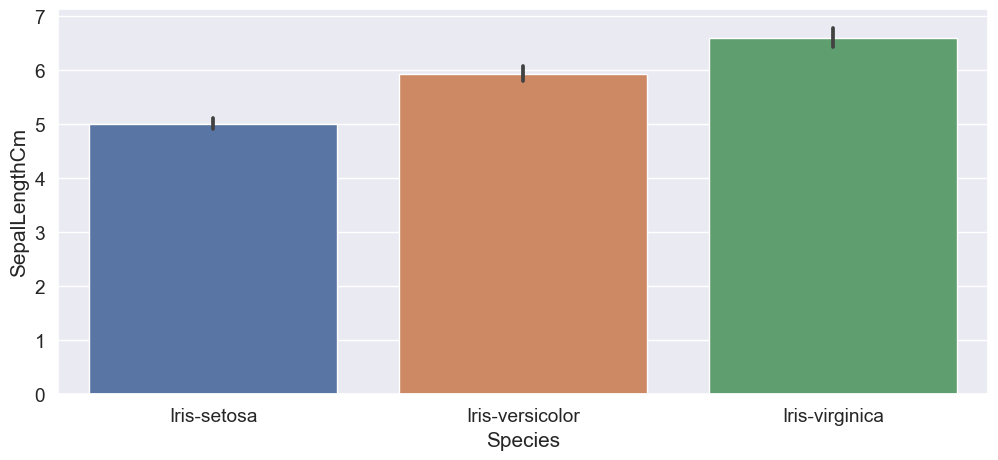

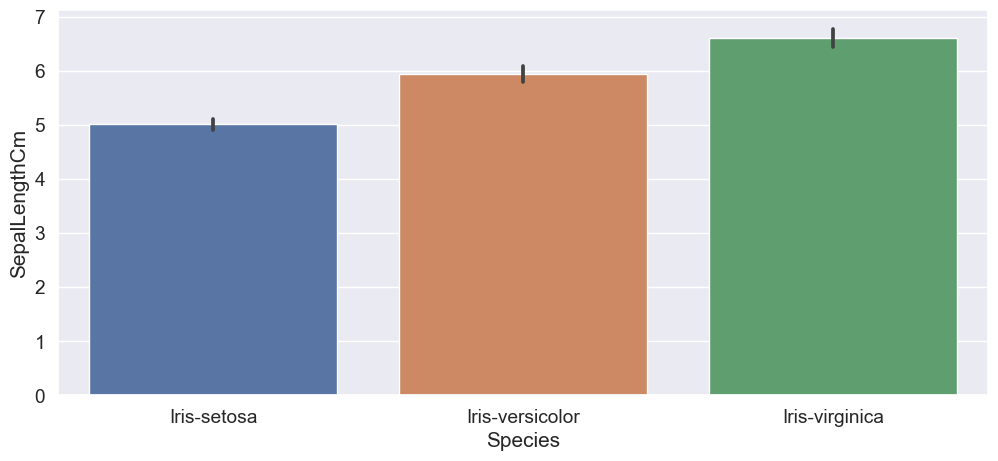

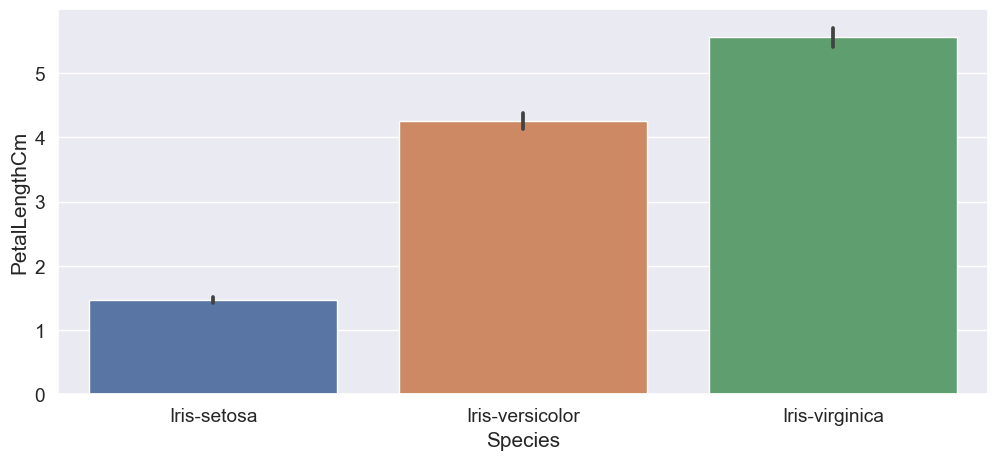

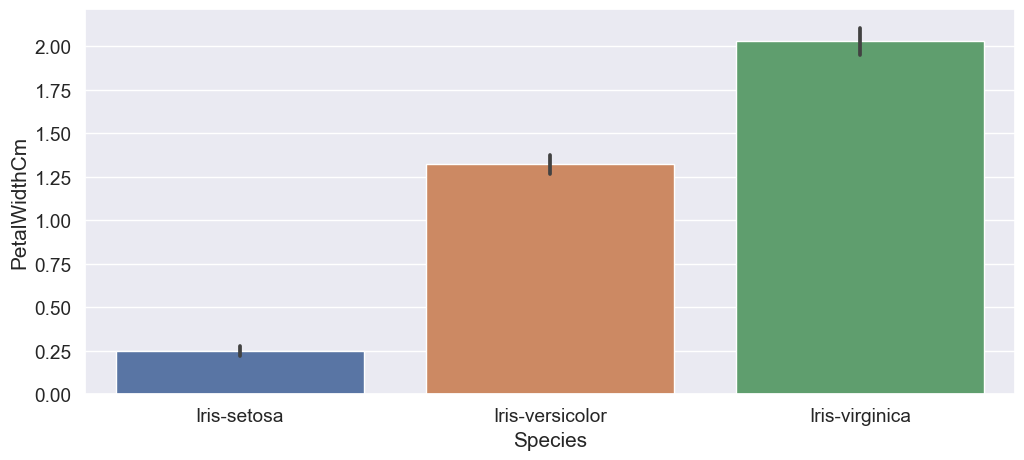

In [56]:
# Bar plot
plt.figure(figsize=(12,5))
sns.barplot(x=df['Species'],y=df['SepalLengthCm'],data=df)
plt.show()
#setosa has the shorter sepal lenght and virginica has longer

plt.figure(figsize=(12,5))
sns.barplot(x=df['Species'],y=df['SepalLengthCm'],data=df)
plt.show()
#setosa has the longer Sepalwidth and Versicolor has shorter Sepalwidth

plt.figure(figsize=(12,5))
sns.barplot(x=df['Species'],y=df['PetalLengthCm'],data=df)
plt.show()
#setosa has the shorter Petallength and Virginica has longer Petallength

plt.figure(figsize=(12,5))
sns.barplot(x=df['Species'],y=df['PetalWidthCm'],data=df)
plt.show()
#setosa has the shorter Petalwidth and Virginica has longer Petalwidth

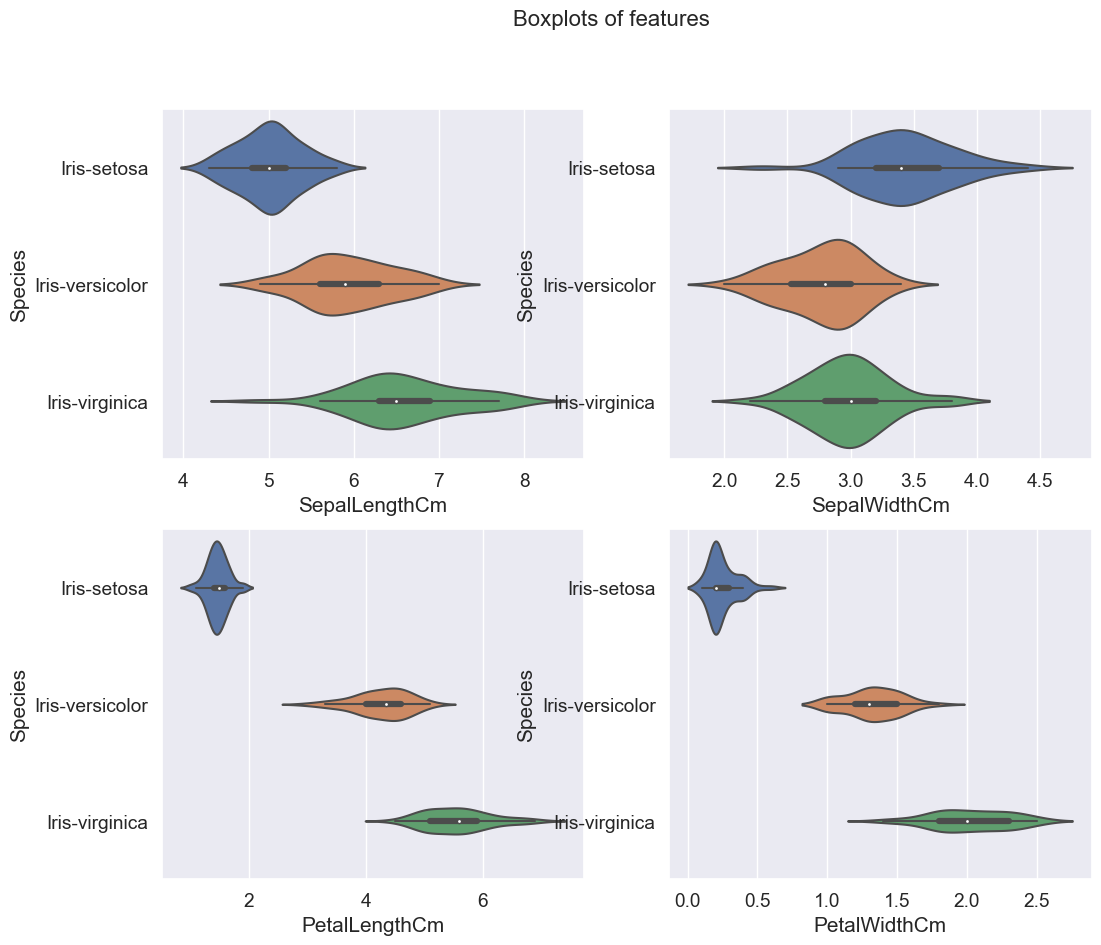

In [57]:
num_columns = list(df.select_dtypes(include=['float']).columns)
num=int(len(num_columns)/2) if int(len(num_columns)/2)>1 else 2
fig ,ax = plt.subplots(num,num,figsize=(12,10))
for j in range(num):
    for i in range(num):
        try:
            sns.violinplot(data=df,x=num_columns[0],y='Species',ax=ax[j][i])
            num_columns.pop(0)
        except:
            fig.delaxes(ax=ax[j][i])
fig.suptitle('Boxplots of features', fontsize=16)
plt.show()

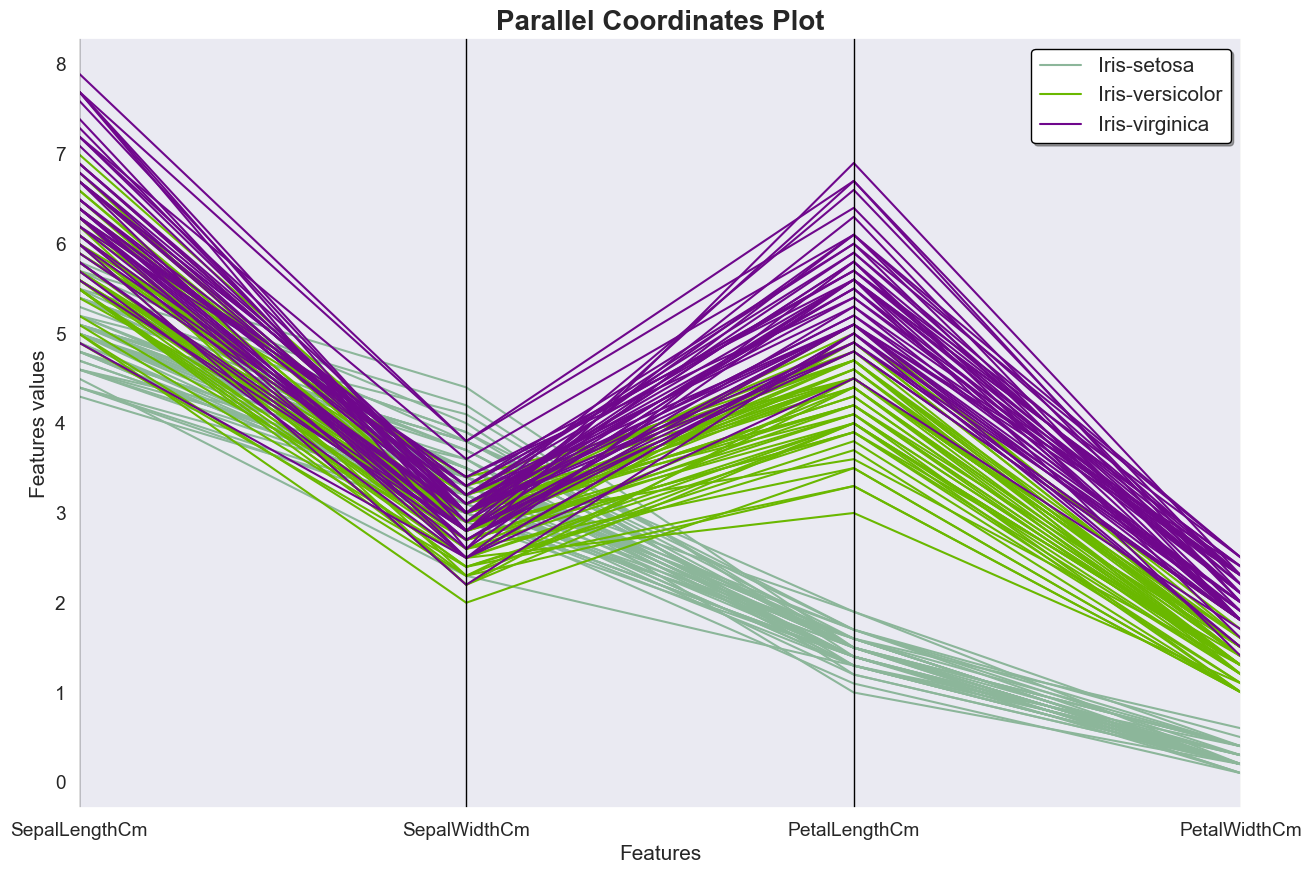

In [58]:
# Parallel Coordinates
plt.figure(figsize=(15, 10))
parallel_coordinates(df, "Species")  # Corrected line
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True, shadow=True, facecolor="white", edgecolor="black")
plt.show()

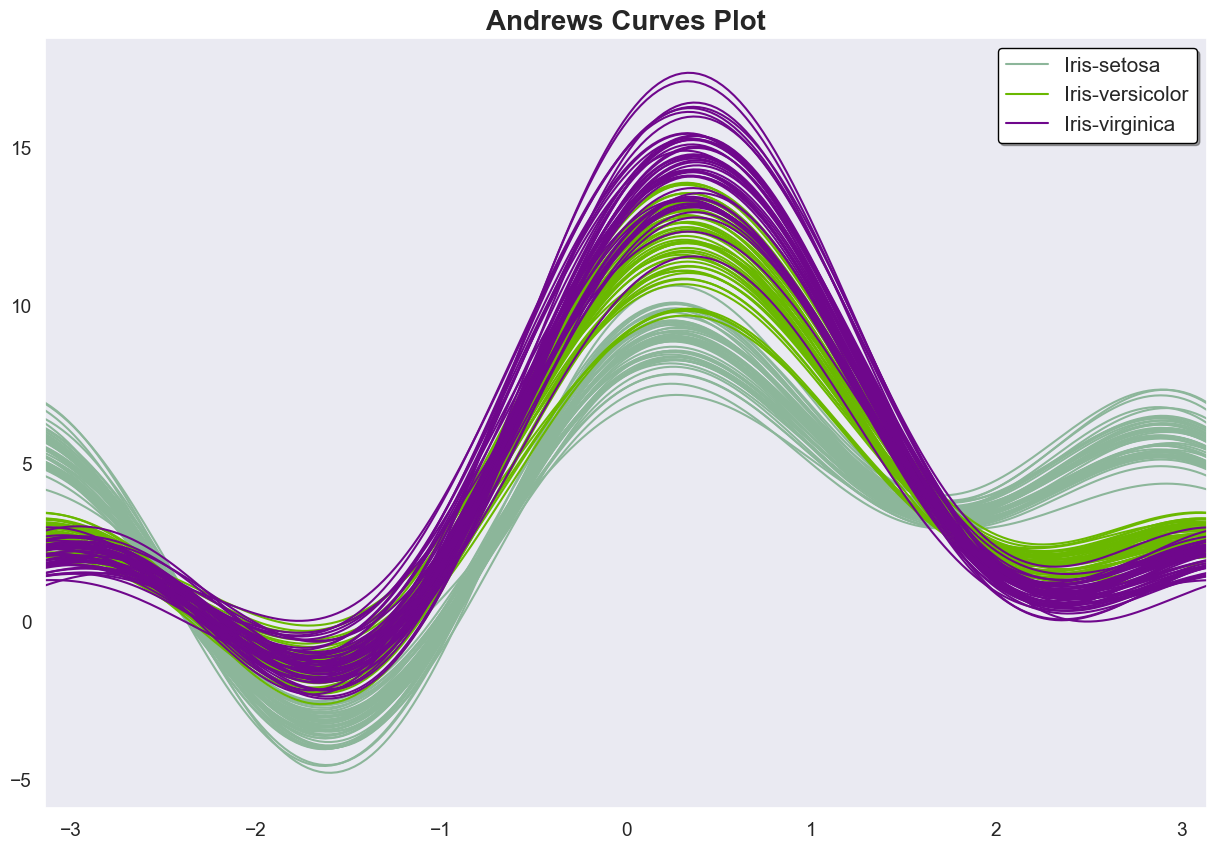

In [59]:
# Andrews curves
from pandas.plotting import andrews_curves
plt.figure(figsize=(15,10))
andrews_curves(df, "Species")
plt.title('Andrews Curves Plot', fontsize=20, fontweight='bold')
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

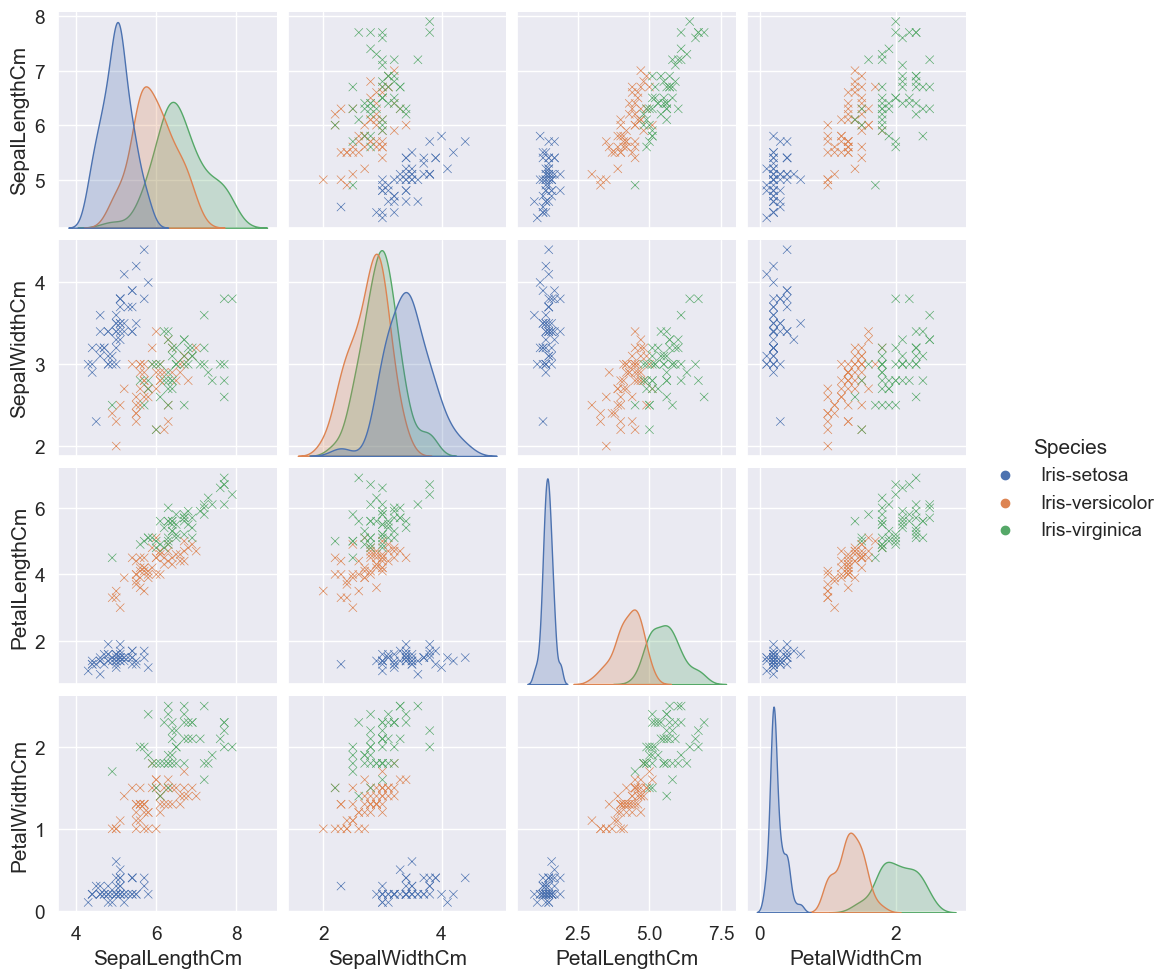

In [60]:
sns.pairplot(df,hue='Species',markers='x')
plt.show()

In [61]:
# Feature Engineering

def separate_columns(df):
    categorical_columns = []
    quantitative_columns = []
    
    for col in df.columns:
        if df[col].dtype == object:
            categorical_columns.append(col)
        elif np.issubdtype(df[col].dtype, np.number):
            quantitative_columns.append(col)
            
    return categorical_columns, quantitative_columns

# You can call this function by passing in your dataframe like this
cat_cols, quan_cols = separate_columns(df)

from sklearn.preprocessing import StandardScaler

def standardize_data(df, columns=None):
    if columns is None:
        # Separate numerical columns if not provided
        _, columns = separate_columns(df)
    scaler = StandardScaler()
    df[columns] = scaler.fit_transform(df[columns])
    return df

standardize_data(df)

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0        -0.915509      1.019971      -1.357737     -1.335700     Iris-setosa
1        -1.157560     -0.128082      -1.357737     -1.335700     Iris-setosa
2        -1.399610      0.331139      -1.414778     -1.335700     Iris-setosa
3        -1.520635      0.101529      -1.300696     -1.335700     Iris-setosa
4        -1.036535      1.249582      -1.357737     -1.335700     Iris-setosa
..             ...           ...            ...           ...             ...
145       1.020892     -0.128082       0.809831      1.444682  Iris-virginica
146       0.536792     -1.276136       0.695748      0.915085  Iris-virginica
147       0.778842     -0.128082       0.809831      1.047484  Iris-virginica
148       0.415766      0.790361       0.923913      1.444682  Iris-virginica
149       0.052691     -0.128082       0.752789      0.782686  Iris-virginica

[147 rows x 5 columns]

In [62]:
# Building model

X = df.drop("Species", axis=1)
y = df["Species"]

# spliting of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
def Evaluate_Performance(Model, X_train, X_test, y_train, y_test) : 
    Model.fit(X_train,y_train)
    overall_score = cross_val_score(Model, X_train,y_train, cv=10)
    model_score = np.average(overall_score)
    Ypredicted = Model.predict(X_test)
    avg = 'weighted'
    print("\n • Training Accuracy Score : ", round(Model.score( X_train,y_train) * 100,2))
    print(f" • Cross Validation Score : {round(model_score * 100,2)}")
    print(f" • Testing Accuracy Score :{round(accuracy_score(y_test, Ypredicted) * 100,2)}")
    print(f" • Precision Score is : {np.round(precision_score(y_test, Ypredicted , average=avg) * 100,2)}")
    print(f" • Recall Score is : {np.round(recall_score(y_test, Ypredicted , average=avg) * 100,2)}")
    print(f" • F1-Score Score is : {np.round(f1_score(y_test, Ypredicted , average=avg) * 100,2)}")

In [64]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix , precision_score,  recall_score, auc,roc_curve,accuracy_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
LogReg = LogisticRegression(solver = "liblinear" , C=50)
LogReg.fit(X_train , y_train.ravel())
y_pred_LR = LogReg.predict(X_test)
print("Logistic Regression : ")
Evaluate_Performance(LogReg, X_train, X_test, y_train, y_test)

Logistic Regression : 

 • Training Accuracy Score :  97.44
 • Cross Validation Score : 95.76
 • Testing Accuracy Score :96.67
 • Precision Score is : 97.0
 • Recall Score is : 96.67
 • F1-Score Score is : 96.67


In [65]:
logmodel_Score=accuracy_score(y_test,y_pred_LR)
print(" accuracy score of logistic Regression: ",logmodel_Score)

 accuracy score of logistic Regression:  0.9666666666666667


In [66]:
LogReg.score(X_train, y_train)

0.9743589743589743

In [67]:
kfold = KFold(37)
LR_r = cross_val_score (LogReg, X, y, cv = kfold)
print(np.std(LR_r))

0.09214987633098552


Feature: 0, Score: -1.55037
Feature: 1, Score: 2.17230
Feature: 2, Score: -3.58998
Feature: 3, Score: -2.88527


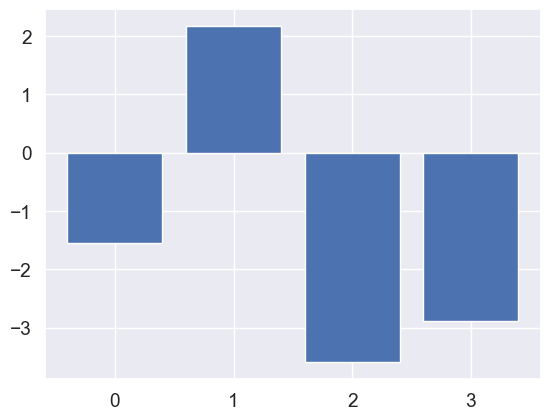

In [68]:
importance = LogReg.coef_[0]

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [69]:
print(accuracy_score(y_test, y_pred_LR))
print('\n')
print(classification_report(y_test, y_pred_LR))

0.9666666666666667


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



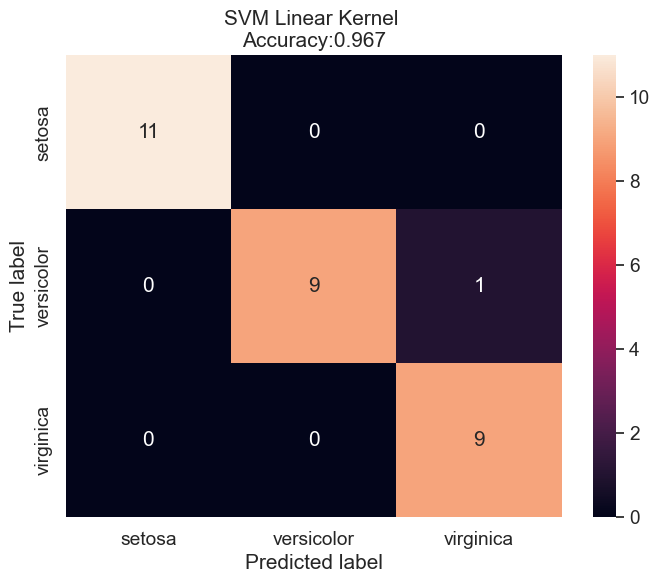

In [70]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred_LR)
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred_LR)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [71]:
logmatrix = confusion_matrix(y_test, y_pred_LR)
logmatrix

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  0,  9]], dtype=int64)

In [72]:
LogReg.coef_

array([[-1.55037133,  2.17230252, -3.5899804 , -2.88527414],
       [ 0.04907894, -1.145857  ,  1.77675499, -1.8706926 ],
       [-1.44599096, -1.57380928,  9.15305593,  6.00155768]])

In [73]:
LogReg.intercept_

array([-3.76945768, -0.87191248, -9.35721285])

In [74]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth = 3)
DT = DT.fit(X_train , y_train)
y_pred_DT = DT.predict(X_test)
print("Decision Tree : ")
Evaluate_Performance(DT, X_train, X_test, y_train, y_test)

Decision Tree : 

 • Training Accuracy Score :  96.58
 • Cross Validation Score : 95.76
 • Testing Accuracy Score :90.0
 • Precision Score is : 90.19
 • Recall Score is : 90.0
 • F1-Score Score is : 89.94


In [75]:
DT_r = cross_val_score (DT, X, y, cv = 10)
D = np.std(DT_r)
print(D)

0.0330772475939281


In [76]:
print(classification_report(y_test, y_pred_DT))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.82      0.90      0.86        10
 Iris-virginica       0.88      0.78      0.82         9

       accuracy                           0.90        30
      macro avg       0.90      0.89      0.89        30
   weighted avg       0.90      0.90      0.90        30



Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.44180
Feature: 3, Score: 0.55820


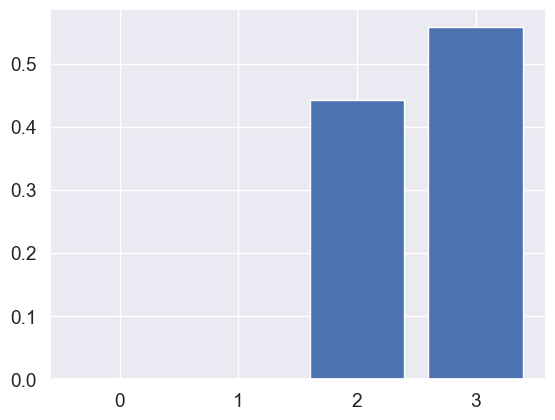

In [77]:
importance = DT.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

<BarContainer object of 4 artists>

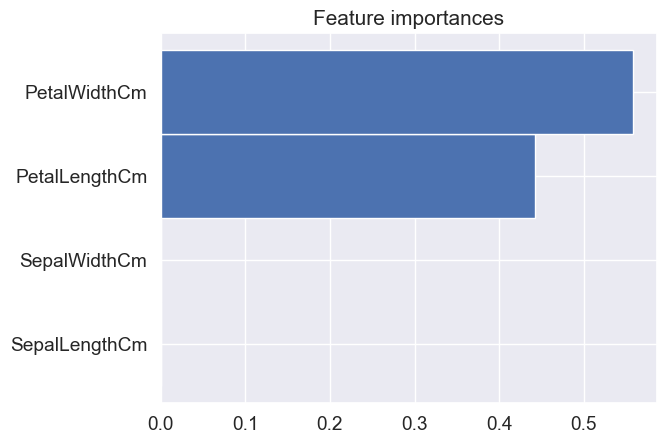

In [78]:
plt.tight_layout()
plt.title("Feature importances")
plt.barh(X.columns, DT.feature_importances_, 1)

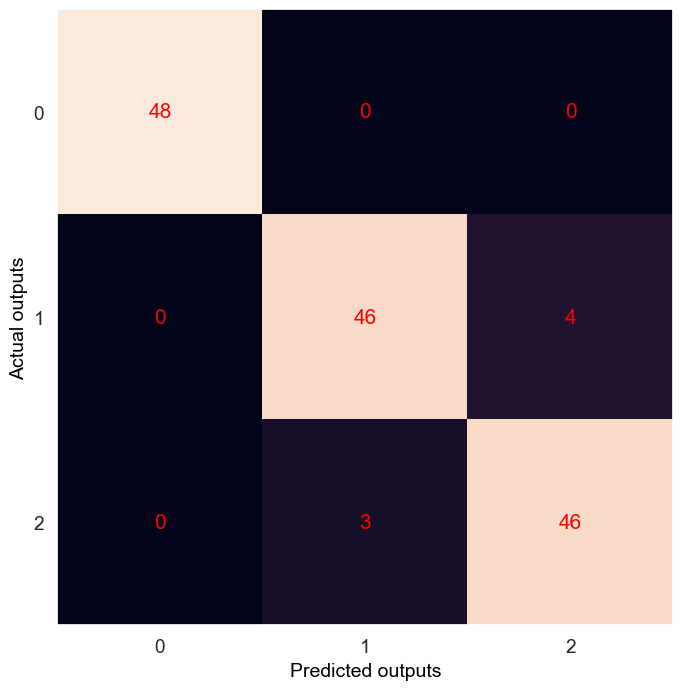

In [79]:
cm = confusion_matrix (y , DT.predict(X))

fig, ax = plt.subplots (figsize = (8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')
ax.xaxis.set(ticks=range(3))
ax.yaxis.set(ticks=range(3))
ax.set_ylim(2.5 , -0.5)

for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha = 'center' , va = 'center' , color = 'red')
        
plt.show()

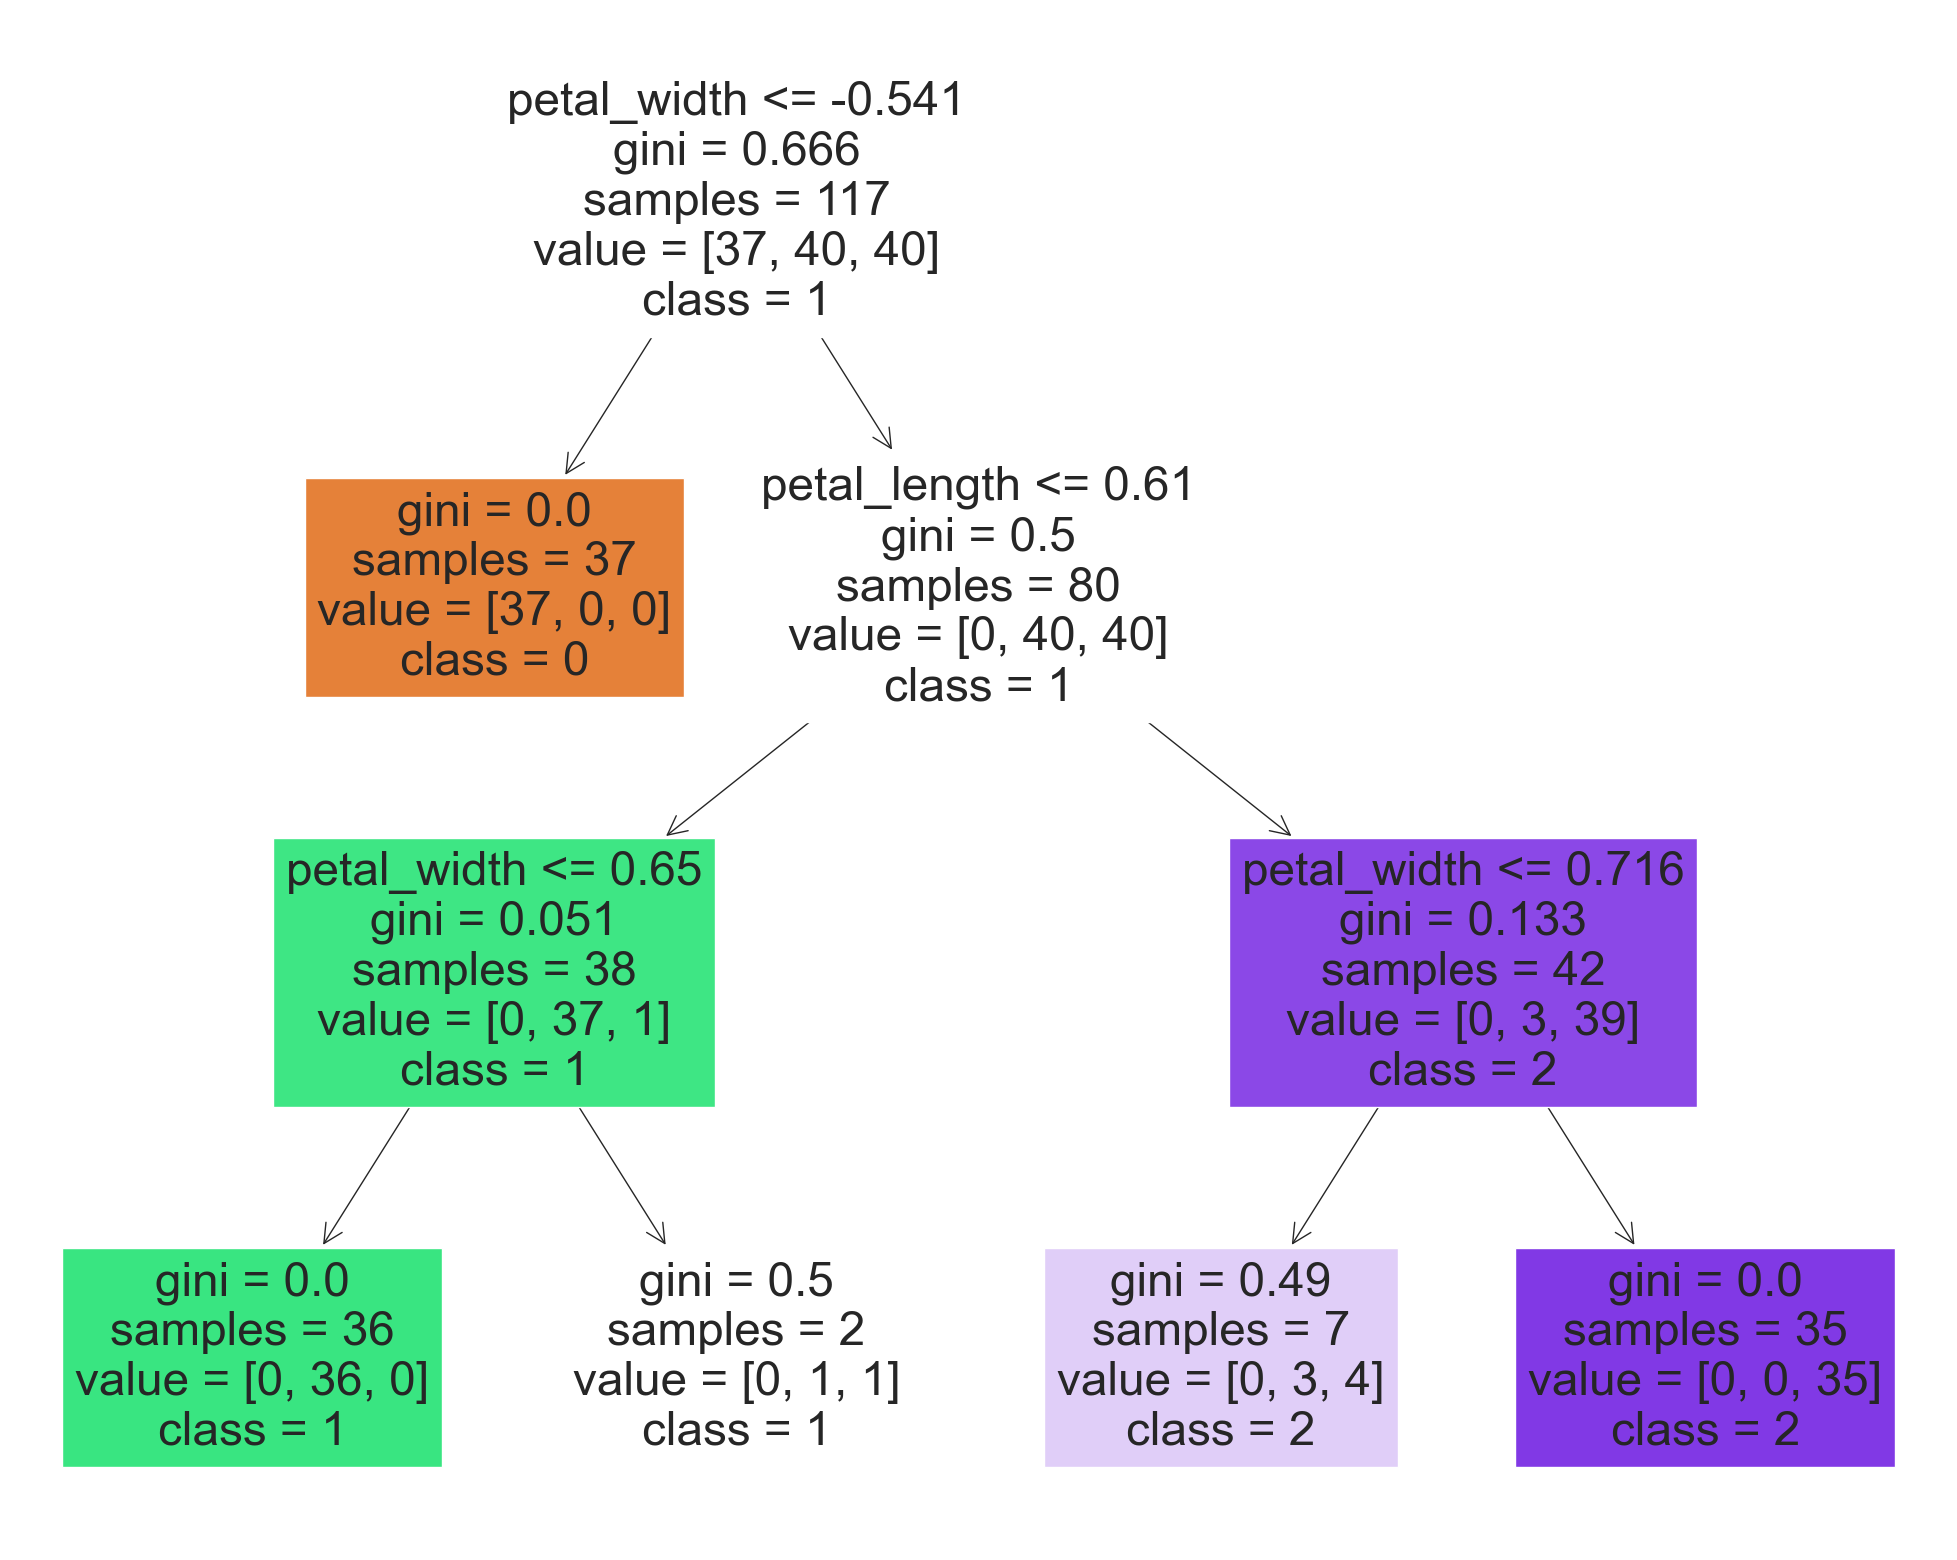

In [80]:
#white box one
from sklearn import tree
F = ["sepal_length" , "sepal_width" , "petal_length" , "petal_width"]
T = ['0' , '1' , '2']
fig = plt.figure(figsize = (25 , 20))
plot = tree.plot_tree (DT , feature_names = F , class_names = T , filled = True)

In [81]:
# Random Forest : 

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 400, max_depth = 3)
RF = RF.fit(X_train , y_train)
y_pred_RF = RF.predict(X_test)
print("Random Forest : ")
Evaluate_Performance(RF, X_train, X_test, y_train, y_test)

Random Forest : 

 • Training Accuracy Score :  98.29
 • Cross Validation Score : 96.59
 • Testing Accuracy Score :93.33
 • Precision Score is : 93.33
 • Recall Score is : 93.33
 • F1-Score Score is : 93.33


In [82]:
RF_r = cross_val_score (RF, X, y, cv = 10)
R = np.std(RF_r)
print(R)

0.059999999999999984


Feature: 0, Score: 0.09111
Feature: 1, Score: 0.01056
Feature: 2, Score: 0.47538
Feature: 3, Score: 0.42295


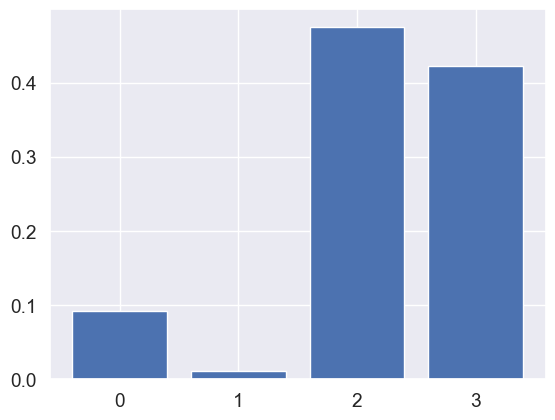

In [83]:
importance = RF.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [84]:
y_pred = RF.predict(X_test)

print(accuracy_score(y_test, y_pred_RF))
print('\n')
print(confusion_matrix(y_test, y_pred_RF))
print('\n')
print(classification_report(y_test, y_pred_RF))

0.9333333333333333


[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



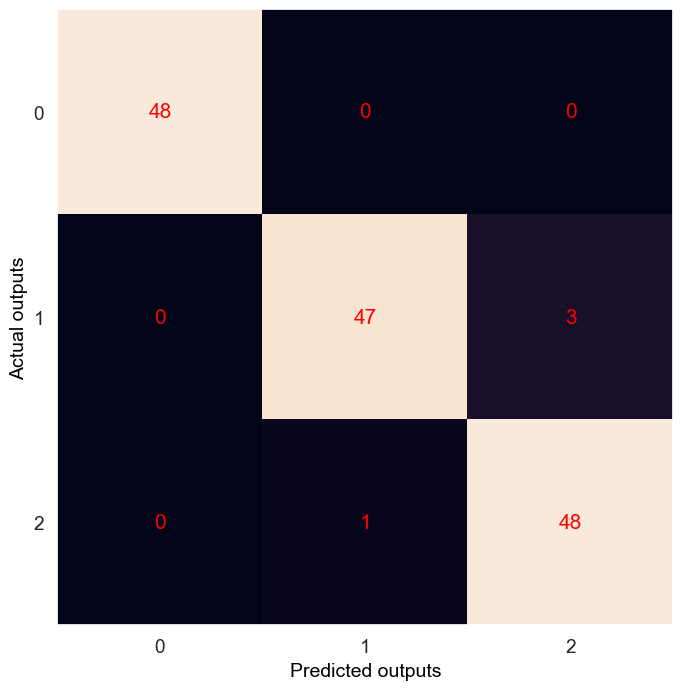

In [85]:
cm = confusion_matrix (y , RF.predict(X))

fig, ax = plt.subplots (figsize = (8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')
ax.xaxis.set(ticks=range(3))
ax.yaxis.set(ticks=range(3))
ax.set_ylim(2.5 , -0.5)

for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha = 'center' , va = 'center' , color = 'red')
        
plt.show()

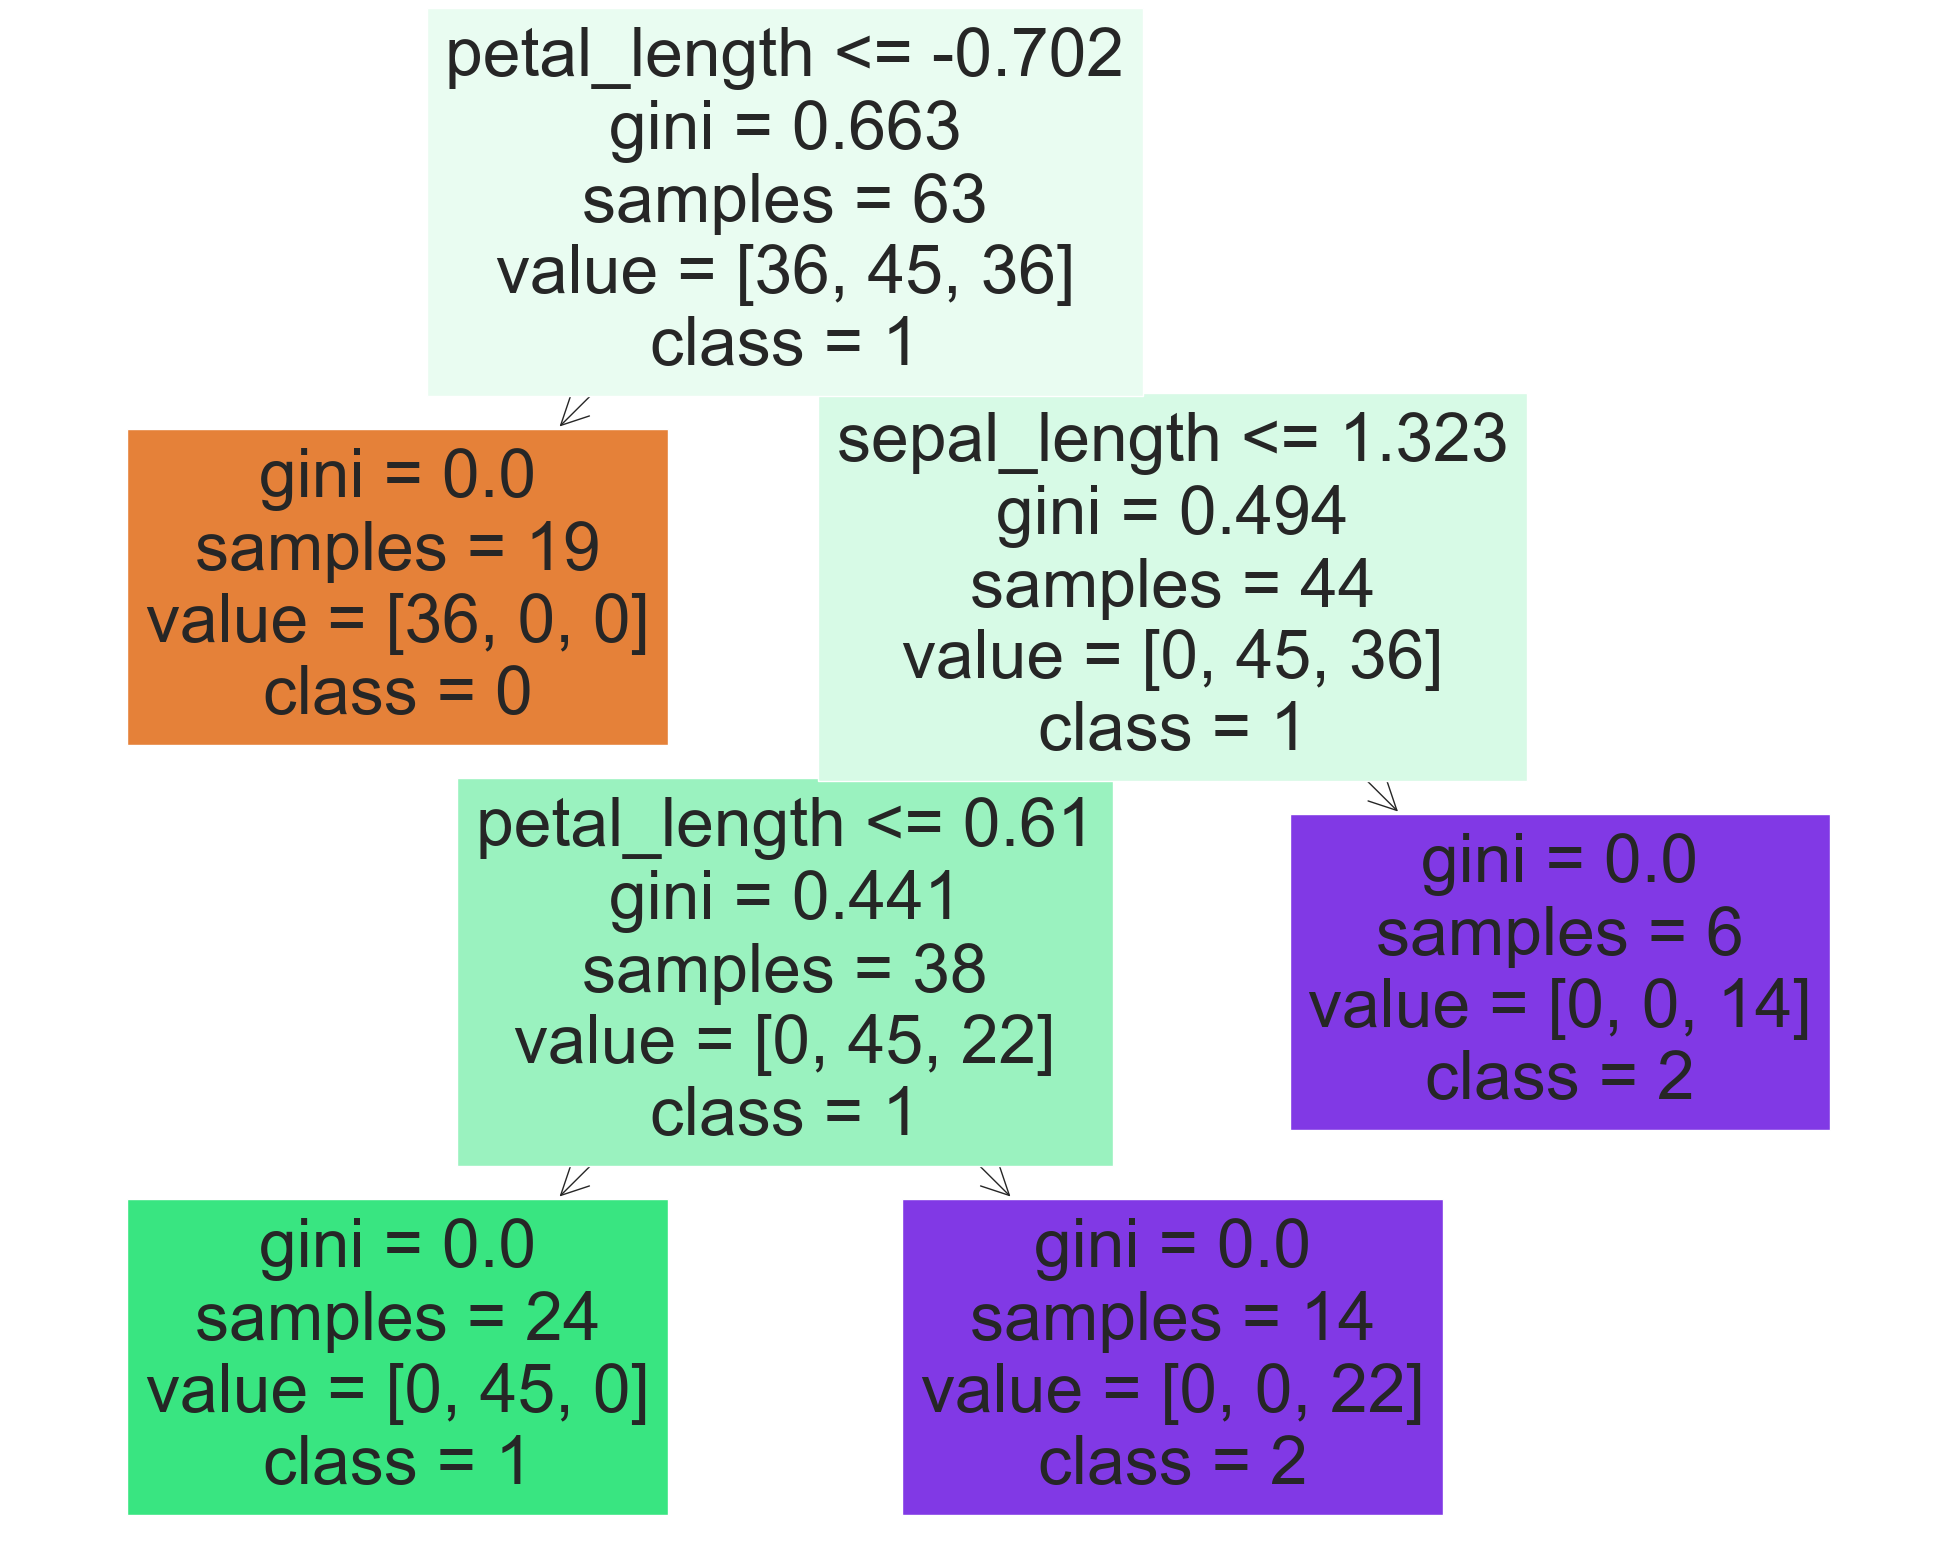

In [86]:
#white box one
F = ["sepal_length" , "sepal_width" , "petal_length" , "petal_width"]
T = ['0' , '1' , '2']
fig = plt.figure(figsize = (25 , 20))
plot = tree.plot_tree (RF.estimators_[5] , feature_names = F , class_names = T , filled = True)

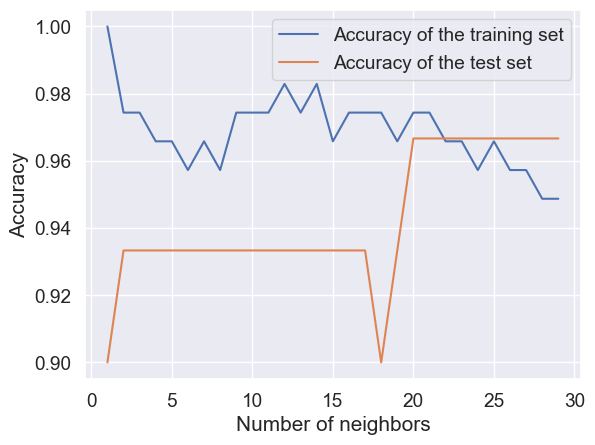

In [87]:
# K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
training_acc = []
test_acc = []

neighbors_setting = range(1,30)

for n_neighbors in neighbors_setting:
    KNN = KNeighborsClassifier(n_neighbors = n_neighbors)
    KNN.fit(X_train , y_train.ravel())
    training_acc.append(KNN.score(X_train , y_train))
    test_acc.append(KNN.score(X_test , y_test))
                    
plt.plot(neighbors_setting , training_acc , label = "Accuracy of the training set")
plt.plot(neighbors_setting , test_acc , label = "Accuracy of the test set")
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.grid(linestyle='-')
plt.legend()

In [88]:
K = 3
KNN = KNeighborsClassifier(K)
KNN.fit(X_train , y_train.ravel())
y_pred_KNN = KNN.predict(X_test)
print("K-Nearest Neighbors : ")
Evaluate_Performance(KNN, X_train, X_test, y_train, y_test)

K-Nearest Neighbors : 

 • Training Accuracy Score :  97.44
 • Cross Validation Score : 95.83
 • Testing Accuracy Score :93.33
 • Precision Score is : 93.33
 • Recall Score is : 93.33
 • F1-Score Score is : 93.33


In [89]:
KNN_r = cross_val_score (KNN, X, y, cv = 10)
K = np.std(KNN_r)
print(K)

0.06543245292430667


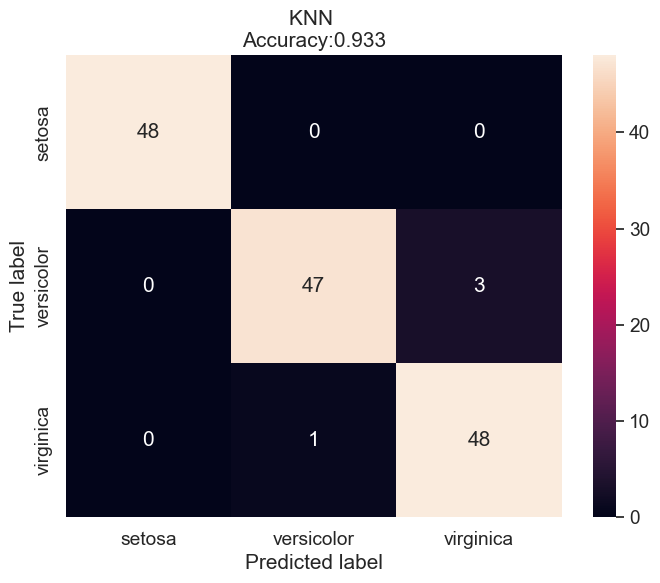

In [90]:
preds = KNN.predict(X_test)
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True)
plt.title('KNN \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, preds)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [91]:
print(accuracy_score(y_test, preds))
print('\n')
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds)) 

0.9333333333333333


[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



In [92]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train , y_train.ravel())
y_pred_NB = NB.predict(X_test)
print("Naive Bayes : ")
Evaluate_Performance(NB, X_train, X_test, y_train, y_test)

Naive Bayes : 

 • Training Accuracy Score :  96.58
 • Cross Validation Score : 96.59
 • Testing Accuracy Score :96.67
 • Precision Score is : 96.97
 • Recall Score is : 96.67
 • F1-Score Score is : 96.65


In [93]:
NB_r = cross_val_score (NB, X, y, cv = 10)
N = np.std(NB_r)
print(N)

0.04268749491621898


In [94]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred_NB))
print(confusion_matrix(y_test, y_pred_NB))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.89      0.94         9

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 10  0]
 [ 0  1  8]]
accuracy is 0.9333333333333333


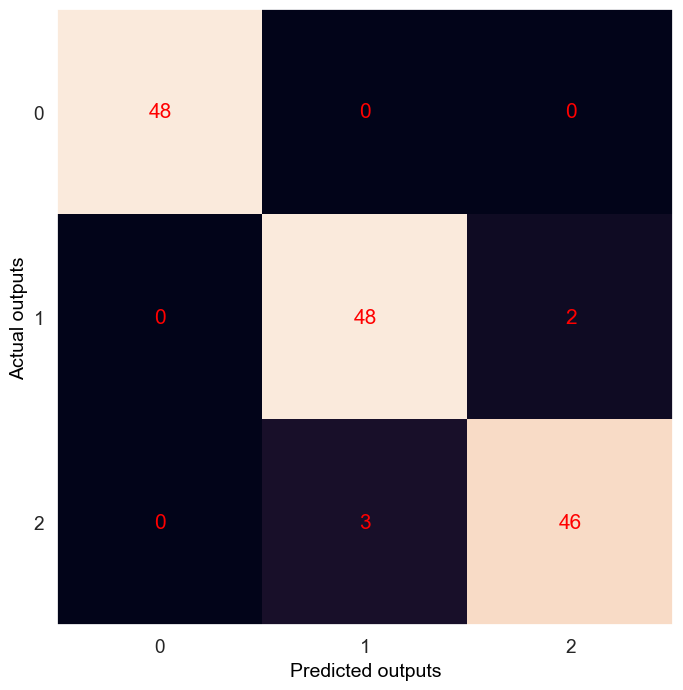

In [95]:
cm = confusion_matrix (y , NB.predict(X))

fig, ax = plt.subplots (figsize = (8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')
ax.xaxis.set(ticks=range(3))
ax.yaxis.set(ticks=range(3))
ax.set_ylim(2.5 , -0.5)

for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha = 'center' , va = 'center' , color = 'red')
        
plt.show()

In [96]:
# Support Vector Machine

from sklearn.svm import SVC
SVM = SVC()
SVM.fit(X_train , y_train)
y_pred_SVM = SVM.predict(X_test)
print("SVM : ")
Evaluate_Performance(SVM, X_train, X_test, y_train, y_test)

SVM : 

 • Training Accuracy Score :  98.29
 • Cross Validation Score : 96.59
 • Testing Accuracy Score :93.33
 • Precision Score is : 93.33
 • Recall Score is : 93.33
 • F1-Score Score is : 93.33


In [97]:
SVM_r = cross_val_score (SVM, X, y, cv = 10)
S = np.std(SVM_r)
print(S)

0.04472135954999579


In [98]:
print(accuracy_score(y_test, y_pred_SVM))
print('\n')
print(confusion_matrix(y_test, y_pred_SVM))
print('\n')
print(classification_report(y_test, y_pred_SVM)) 

0.9333333333333333


[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



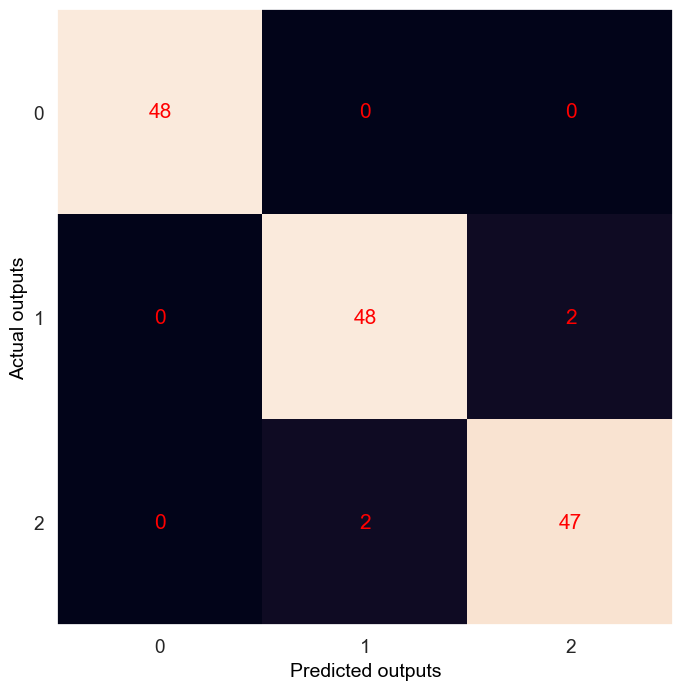

In [99]:
cm = confusion_matrix (y , SVM.predict(X))

fig, ax = plt.subplots (figsize = (8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')
ax.xaxis.set(ticks=range(3))
ax.yaxis.set(ticks=range(3))
ax.set_ylim(2.5 , -0.5)

for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha = 'center' , va = 'center' , color = 'red')
        
plt.show()

In [100]:
# Conclusion
from tabulate import tabulate
models = pd.DataFrame ({'Model' : ['Logestic Regression' , ' KNN' , 'Naive Bayes' , 'SVM' , 'Decision Tree' , 'Random Forest'] ,
                        'Precision' : [precision_score(y_test, y_pred_LR, average='weighted') , precision_score(y_test, y_pred_KNN, average='weighted') , precision_score(y_test, y_pred_NB, average='weighted') , precision_score(y_test, y_pred_SVM, average='weighted') , precision_score(y_test, y_pred_DT, average='weighted') , precision_score(y_test, y_pred_RF, average='weighted')] ,
                        'Recall' : [recall_score(y_test, y_pred_LR, average='weighted') , recall_score(y_test, y_pred_KNN, average='weighted') , recall_score(y_test, y_pred_NB, average='weighted') , recall_score(y_test, y_pred_SVM, average='weighted') , recall_score(y_test, y_pred_DT, average='weighted') , recall_score(y_test, y_pred_RF, average='weighted')] ,
                        'F1-score' : [f1_score(y_test, y_pred_LR, average='weighted') , f1_score(y_test, y_pred_KNN, average='weighted') , f1_score(y_test, y_pred_NB, average='weighted') , f1_score(y_test, y_pred_SVM, average='weighted') , f1_score(y_test, y_pred_DT, average='weighted') , f1_score(y_test, y_pred_RF, average='weighted')] ,
                        'Accuracy' : [accuracy_score(y_test, y_pred_LR) , accuracy_score(y_test, y_pred_KNN) , accuracy_score(y_test, y_pred_NB) , accuracy_score(y_test, y_pred_SVM) , accuracy_score(y_test, y_pred_DT) , accuracy_score(y_test, y_pred_RF)], 
                        'Err' : [np.std(LR_r) , np.std(KNN_r) , np.std(NB_r) , np.std(SVM_r) , np.std(DT_r) , np.std(RF_r)]})

print(tabulate(models, headers='keys', tablefmt='rst'))

====  ===================  ===========  ========  ==========  ==========  =========
  ..  Model                  Precision    Recall    F1-score    Accuracy        Err
====  ===================  ===========  ========  ==========  ==========  =========
   0  Logestic Regression     0.97      0.966667    0.966667    0.966667  0.0921499
   1  KNN                     0.933333  0.933333    0.933333    0.933333  0.0654325
   2  Naive Bayes             0.969697  0.966667    0.96648     0.966667  0.0426875
   3  SVM                     0.933333  0.933333    0.933333    0.933333  0.0447214
   4  Decision Tree           0.901894  0.9         0.89944     0.9       0.0330772
   5  Random Forest           0.933333  0.933333    0.933333    0.933333  0.06
====  ===================  ===========  ========  ==========  ==========  =========


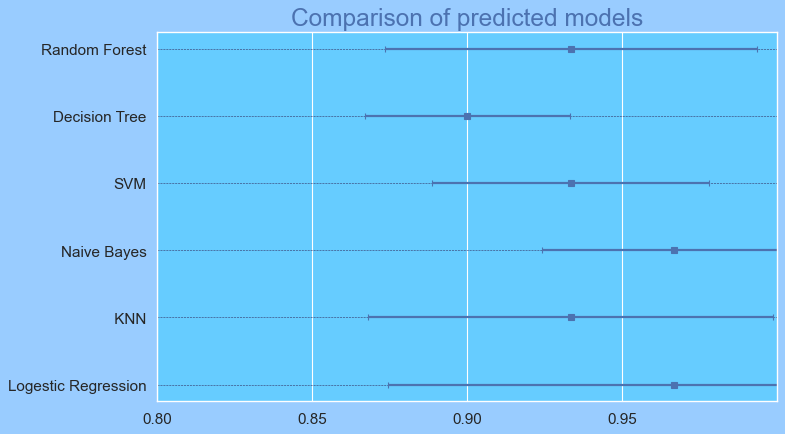

In [101]:
fig, ax = plt.subplots(figsize=(10, 6), dpi= 80, facecolor='#99ccff')

ax.set_facecolor('#66ccff')

ax.set_title('Comparison of predicted models', fontdict={'size':22} , color='b')

ax.errorbar(models['Accuracy'], models['Model'], xerr = models['Err'] , fmt='o', marker='s', color='b' 
            , linewidth=2, capsize=3)

ax.set(xlim=(0.8, 1), xticks=np.arange(0.8, 1, step = 0.05))

plt.grid(color = '#333366', axis = 'y', linestyle = '--', linewidth = 0.5)

plt.show()